# <center>Trabajo Práctico 1: Reservas de Hotel</center>

## <center>Organización de Datos</center>
#### <center>Cátedra Ing. Rodriguez, Juan Manuel </center>

Grupo 32 - Kung Fu Pandas

Integrantes:
* Daniel Agustin Marianetti - Padrón: 106256
* Franco Rodriguez - Padrón: 102815
* Ezequiel Lazarte - Padrón: 108063

Importamos las librerias que vamos a utilizar

In [1]:
import pandas as pd
from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df_original = pd.read_csv('/content/drive/MyDrive/datasetsTP/hotels_train.csv')
df = df_original.copy()

## Exploracion Inicial

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

## Variables Cualitativas

- 'hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'is_canceled', 'is_repeated_guest', 'agent', 'company'


## Variables Cuantitativas

- Discretas: 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests'

- Continuas: 'adr',  


## Medidas de las variables cuantitativas

In [4]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,54023.000000,3152.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.027991,0.114790,0.115420,0.195952,84.541010,188.539340,2.638977,102.383773,0.049957,0.523703,0.499750
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.164948,0.993723,1.396359,0.610519,109.523772,129.457025,18.619092,47.757640,0.221023,0.775412,0.500004
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,70.000000,0.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,179.000000,0.000000,95.000000,0.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000,270.000000,0.000000,126.000000,0.000000,1.000000,1.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,1.000000,26.000000,70.000000,17.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000,1.000000


Estos valores son por default sólo calculados para aquellas variables tipo numéricas, lo cual tiene sentido por la naturaleza de los valores calculados. Sin embargo no son todos representativos en este caso ya que hay muchos valores discretos en los cuales no tiene sentido. Para este dataset, las columnas para los cuales estos valores son significativos son 'lead_time', 'adults', 'children', 'babies', 'previous_cancellations' y 'days_in_waiting_list'. Si bien pareciera que para otras variables como 'required_car_parking_spaces' son valores importantes, a medida que desarrollemos el análisis veremos que no porque son casos particulares (también por eso la mediana es 0 y la media tiende a 0)

## Variables Cualitativas

In [5]:
columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns
frecuencias_por_variable = {}
for columna in columnas_categoricas:
    frecuencias_por_variable[columna] = df[columna].value_counts()

# Se muestran solo las primeras 10 filas, para evitar truncamiento por cantidad de datos.
for columna, frecuencias in frecuencias_por_variable.items():
    print(f"Variable: {columna}")
    print(frecuencias.head(10).to_string())
    print("\n" + "="*40 + "\n")

Variable: hotel
City Hotel      42129
Resort Hotel    19784


Variable: arrival_date_month
August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493


Variable: meal
BB           47837
HB            7452
SC            5556
Undefined      591
FB             477


Variable: country
PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
ITA     1911
IRL     1617
BRA     1152
BEL     1124
USA     1021


Variable: market_segment
Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2


Variable: distribution_channel
TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4


Variable: reserved_room_type
A    45134
D     9585
E     3249
F     1451
G     1090
B      580
C      482
H      334
P        

## Analisis gráfico de las distribuciones de las variables

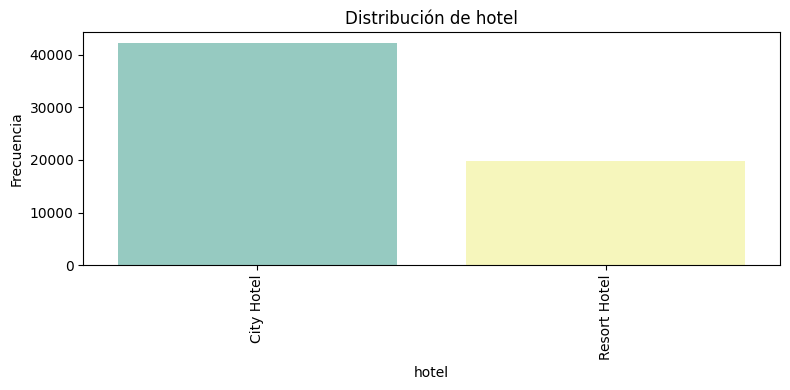

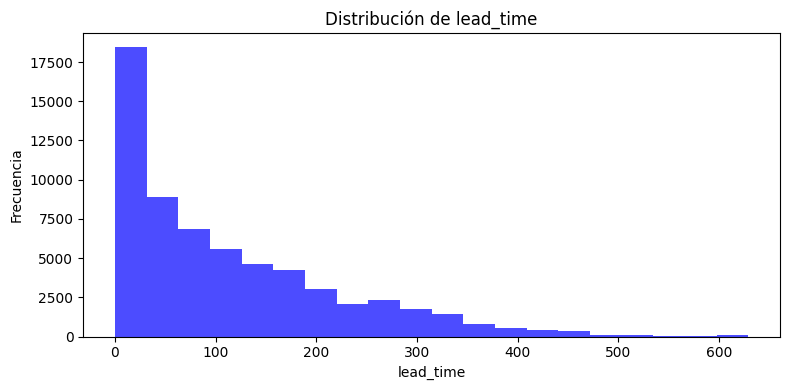

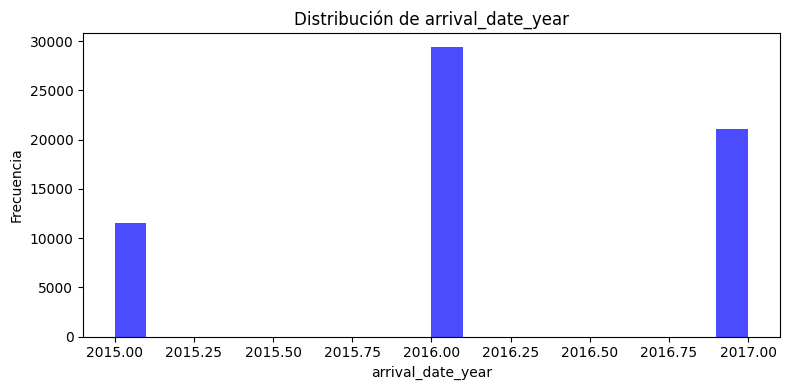

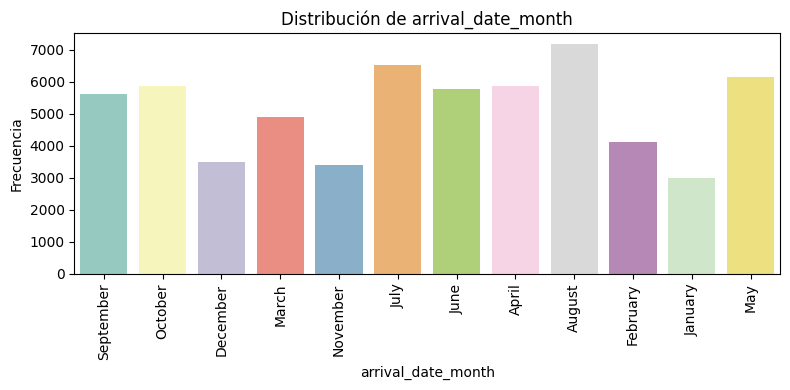

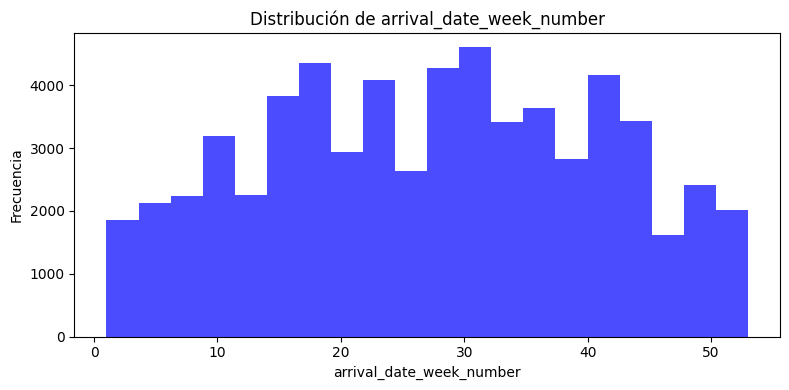

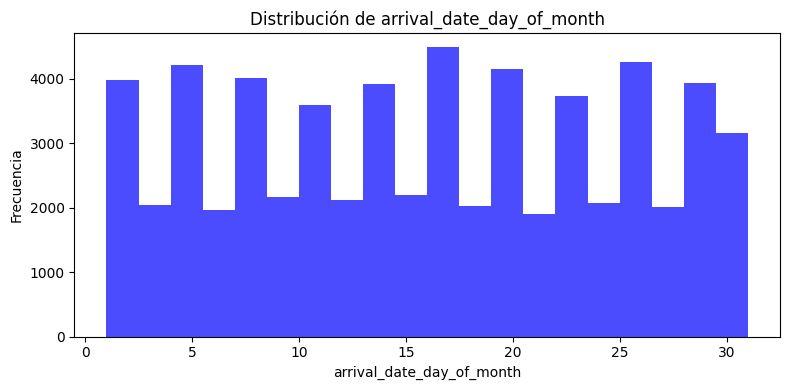

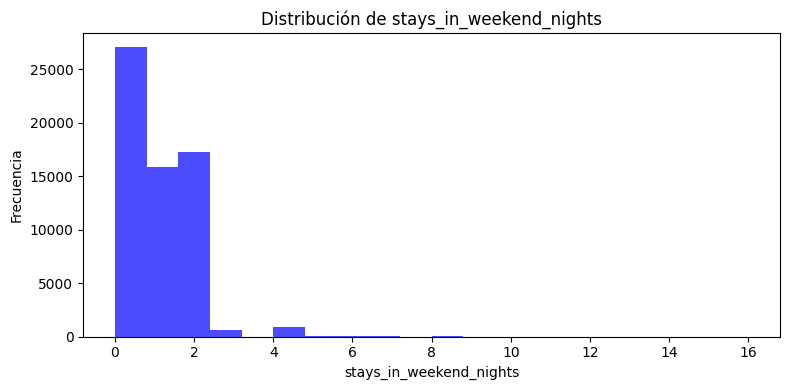

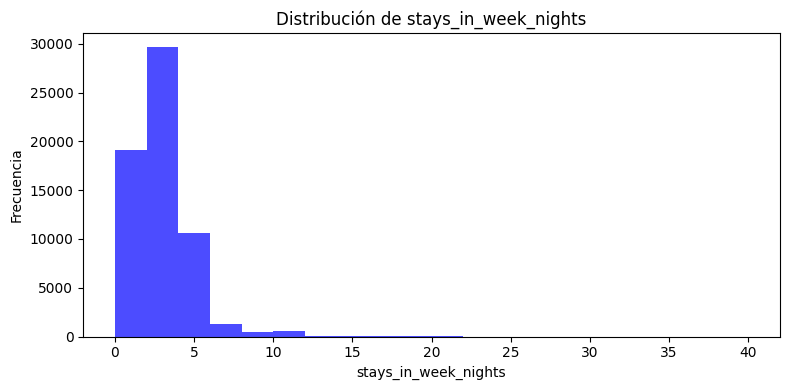

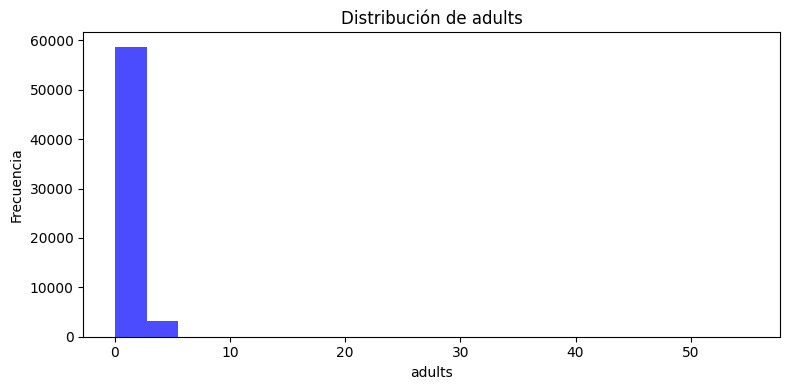

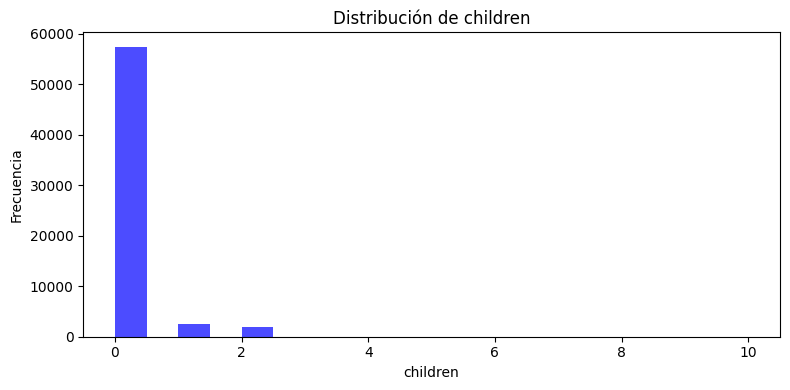

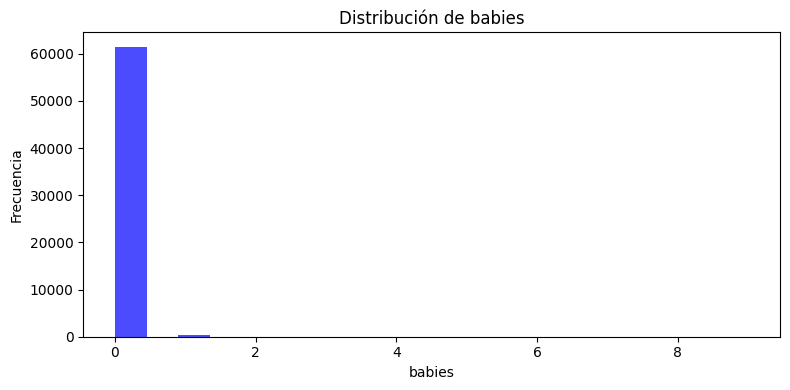

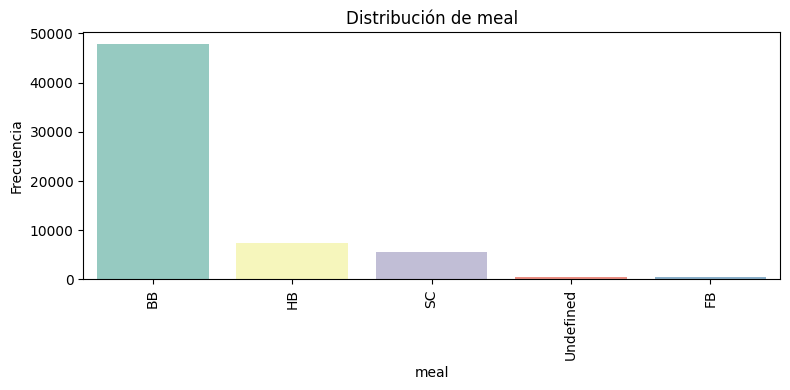

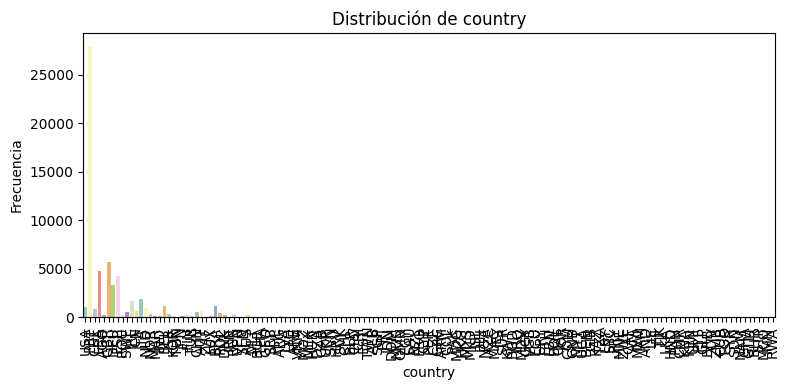

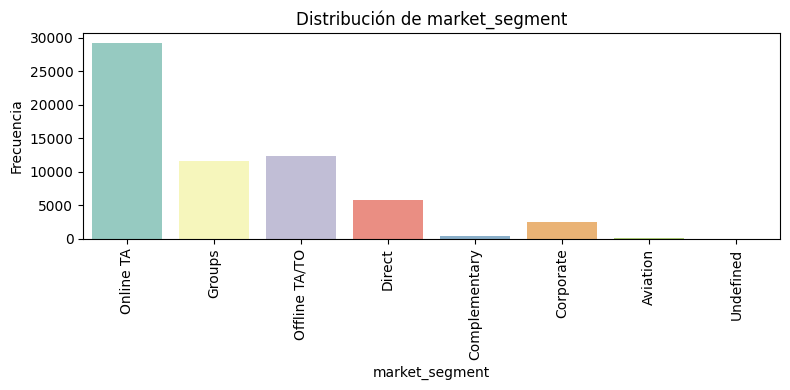

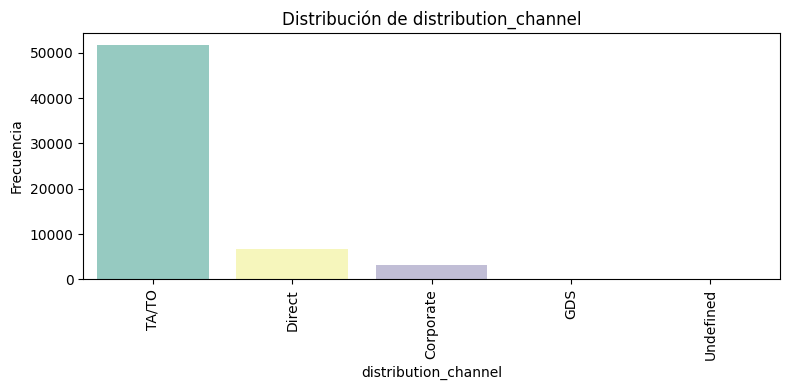

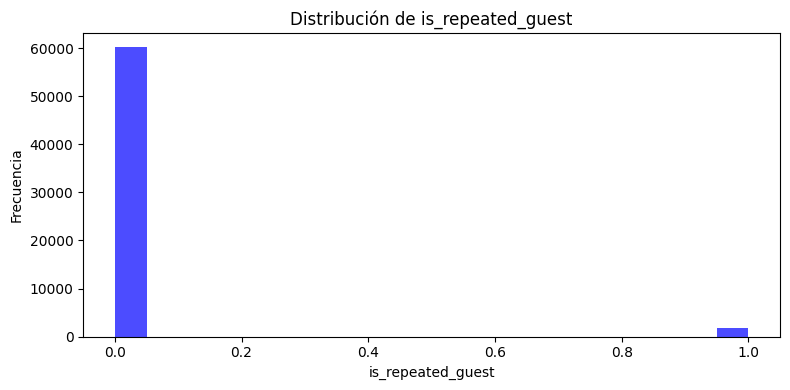

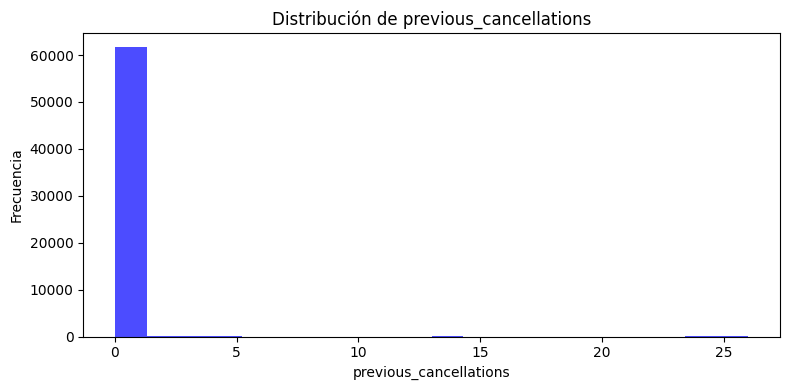

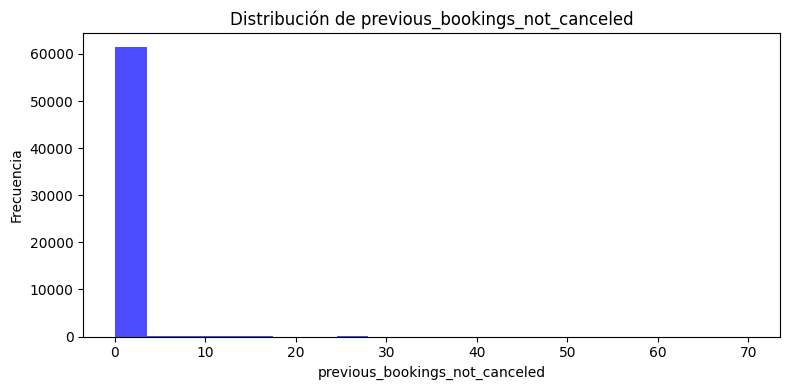

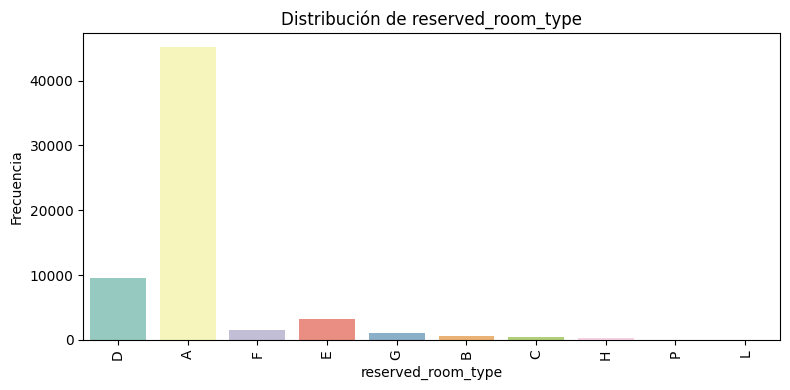

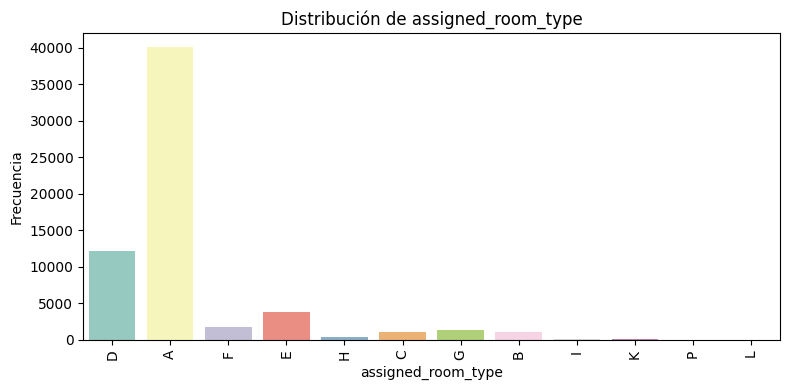

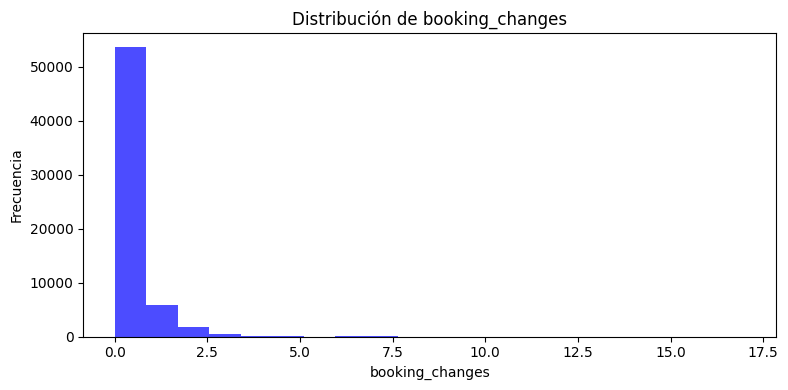

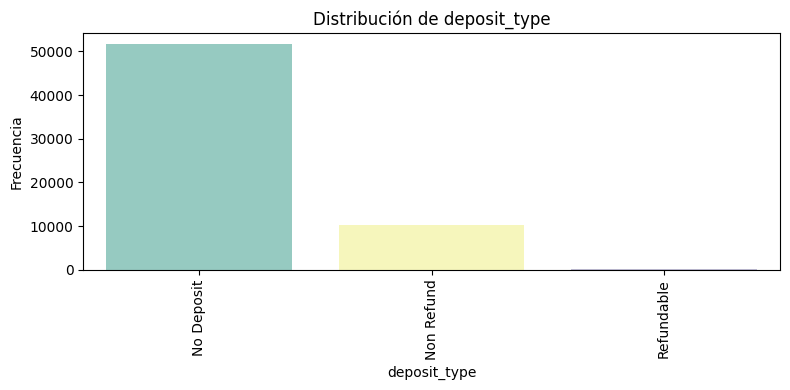

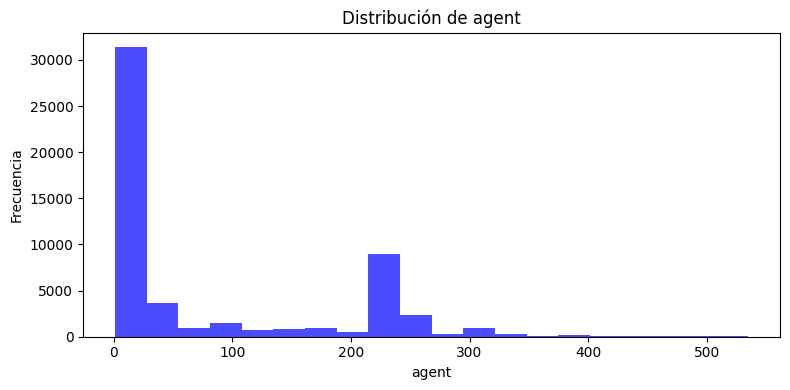

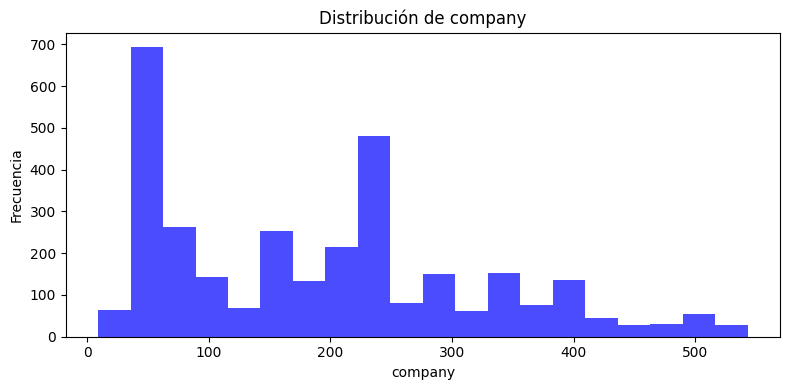

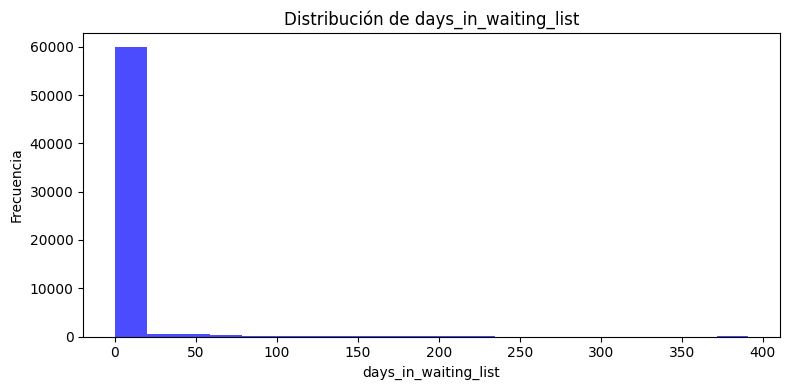

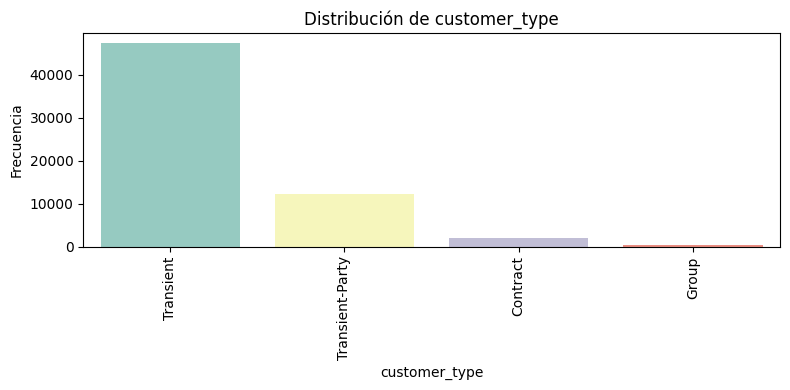

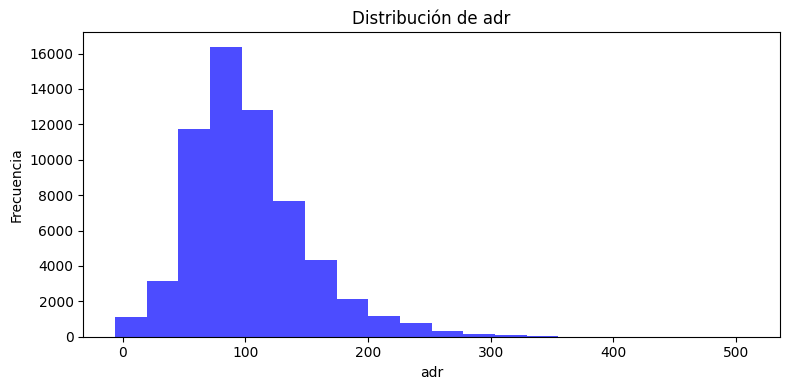

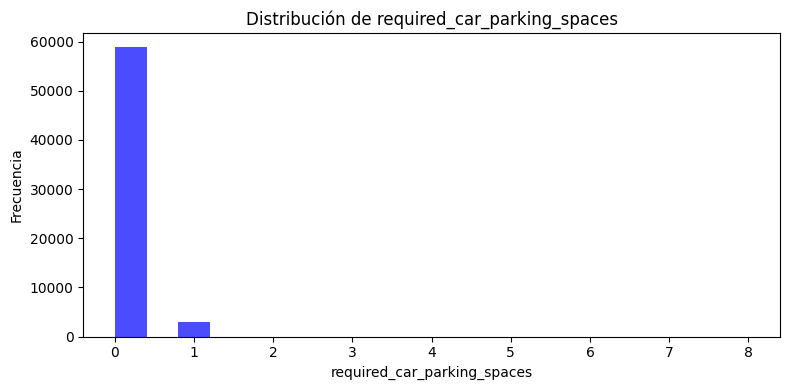

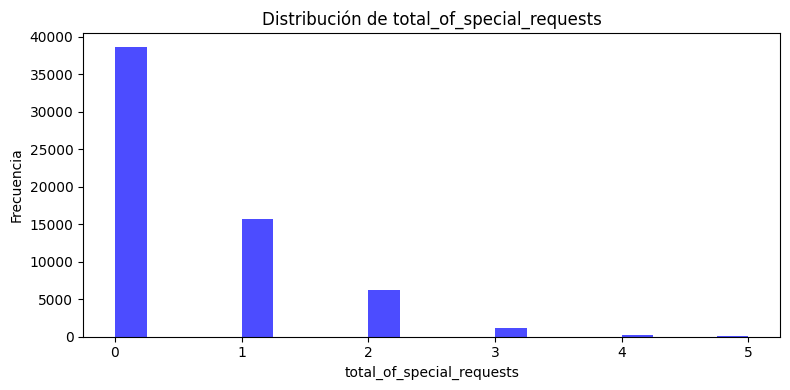

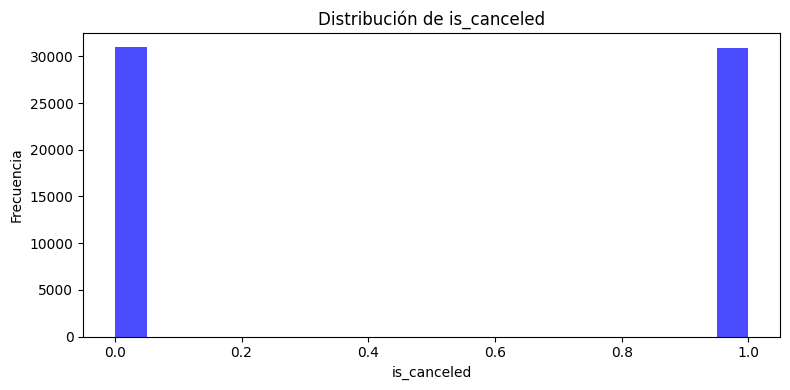

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df_distribuciones = df.copy()
df_distribuciones = df_distribuciones.drop('id', axis=1)

for columna in df_distribuciones.columns:
    plt.figure(figsize=(8, 4))

    if pd.api.types.is_numeric_dtype(df_distribuciones[columna]):
        plt.hist(df_distribuciones[columna], bins=20, color='blue', alpha=0.7)
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
        plt.title(f'Distribución de {columna}')
    else:
        sns.countplot(data=df_distribuciones, x=columna, palette='Set3')
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
        plt.title(f'Distribución de {columna}')
        plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

Los anteriores graficos nos proporcionan una visión general de la naturaleza de los datos en todas las variables. Esto nos permite familiarizarnos con las características de tu conjunto de datos y tener una idea inicial de lo que puedes esperar y tener un panorama mas amplio de como se comportan las variables de nuestro dataset. En resumen nos proporcionan una base solida para comprender, preparar y explorar nuestros datos, para obtener informacion util y tomar decisiones de nuestro proyecto.

## Variables irrelevantes, correlacion entre variables, relacion entre variables y el target, visualización de datos


### Correlación entre variables

Heat-map entre variables

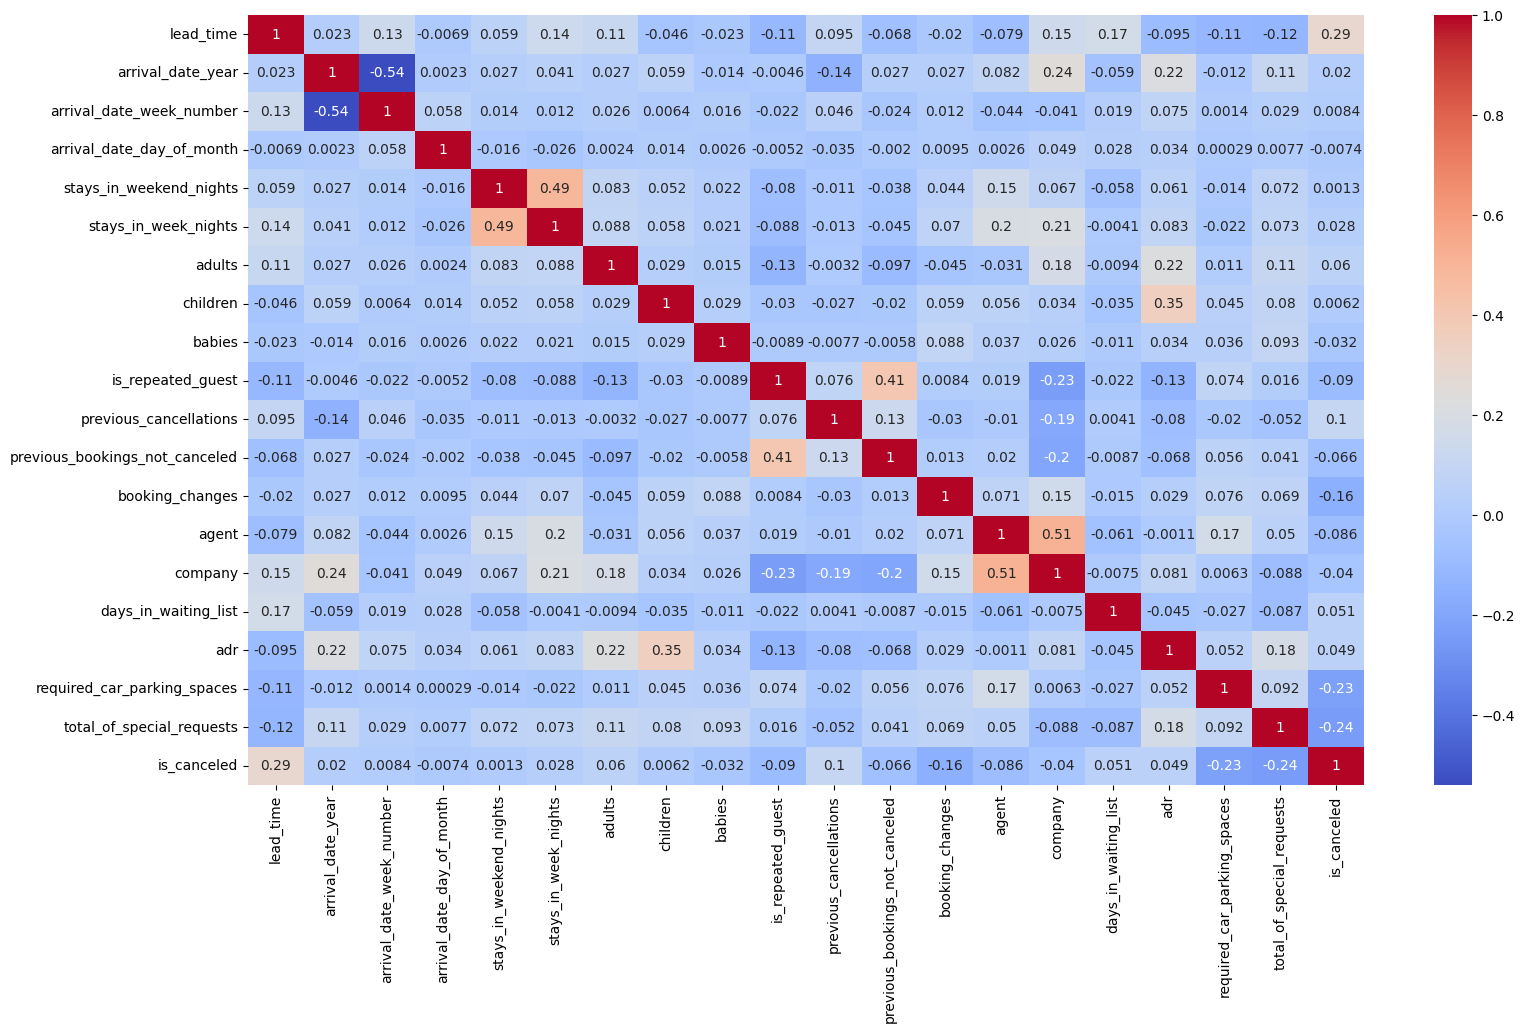

In [7]:
# Variables cuantitativas
correlacion = df.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.show()

Explicacion heatmap y sus valores:

Correlación positiva: Si una variable tiene una correlación positiva con "is_canceled," significa que a medida que los valores de la variable aumentan, es más probable que la reserva sea cancelada. En otras palabras, un aumento en los valores de la variable se asocia con un mayor riesgo de cancelación.

Correlación negativa: Si una variable tiene una correlación negativa con "is_canceled," significa que a medida que los valores de la variable aumentan, es menos probable que la reserva sea cancelada. En este caso, un aumento en los valores de la variable se asocia con un menor riesgo de cancelación.

Correlación cercana a cero: Si la correlación entre una variable y "is_canceled" es cercana a cero, significa que no existe una relación lineal fuerte entre esas dos variables. En otras palabras, la variable no parece tener un impacto significativo en la cancelación de reservas.

Tomaremos un valor cercano a cero, a todo n tal que |n| < 0.01

Correlación de pearson

Analizamos la relación entre las variables días en lista de espera y días de anticipación

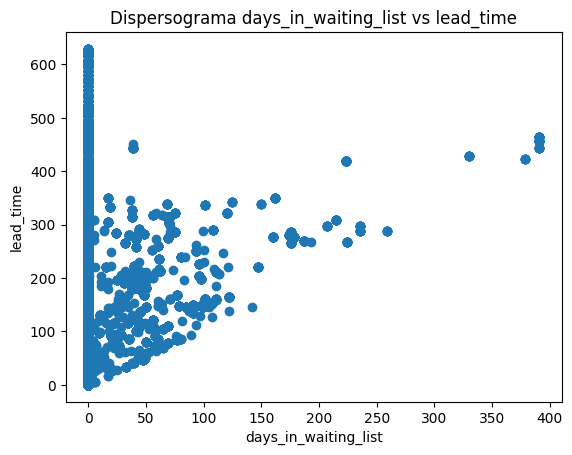

In [8]:
plt.scatter(df.days_in_waiting_list, df.lead_time)
plt.title('Dispersograma days_in_waiting_list vs lead_time')
plt.xlabel('days_in_waiting_list')
plt.ylabel('lead_time')
plt.show()

In [9]:
df_filtrado = df[df['days_in_waiting_list'] > 0]
corr_pearson = np.corrcoef(df_filtrado.days_in_waiting_list, df_filtrado.lead_time)[0][1]
print(f"Correlación Pearson: r={corr_pearson}")

Correlación Pearson: r=0.5768614419136298


Encontramos que las variables parecieran tener una correlación lineal y calculando la correlación de pearson, filtrando los días en los que no se espero ningun día para no afectar el resultado, nos da un valor de 0.584 el cual nos confirma que existe una cierta relación.

### Variables vs target

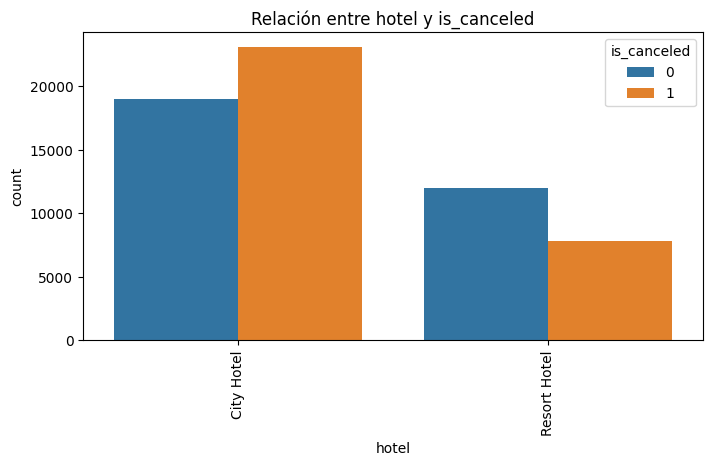

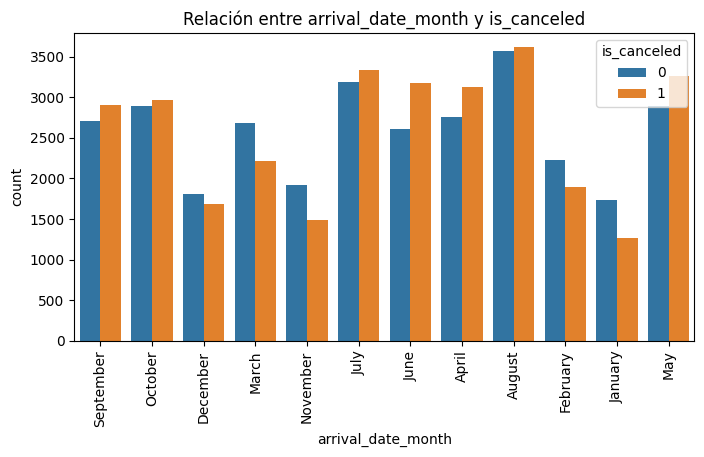

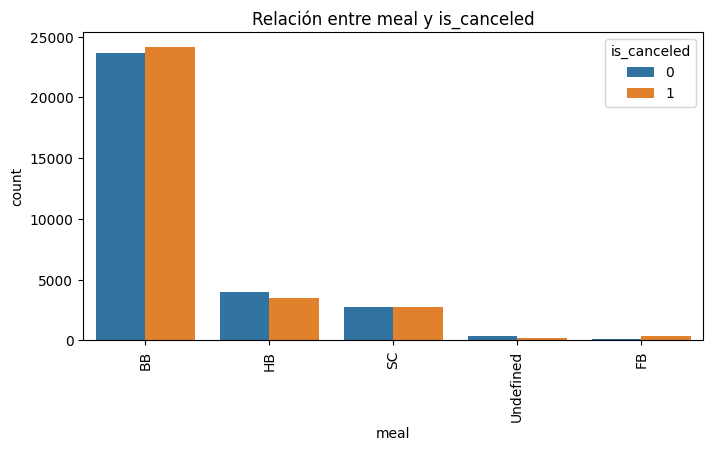

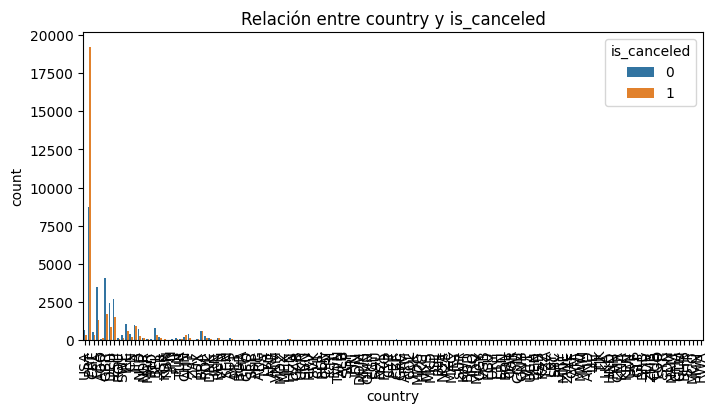

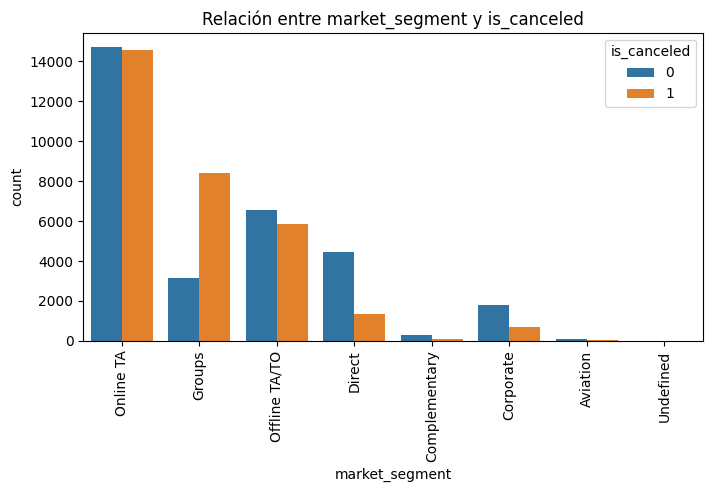

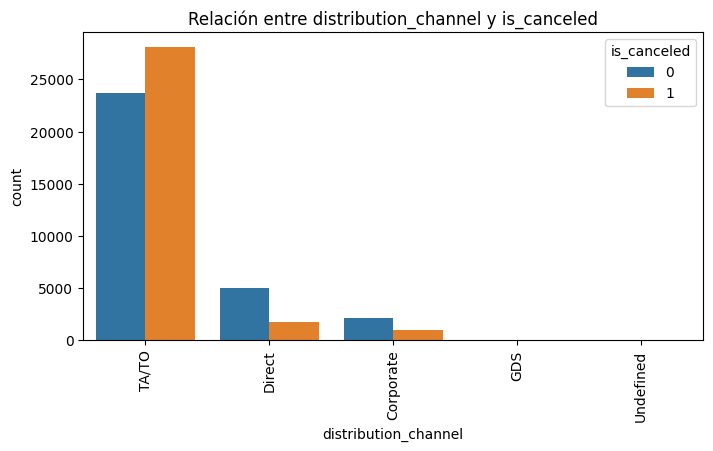

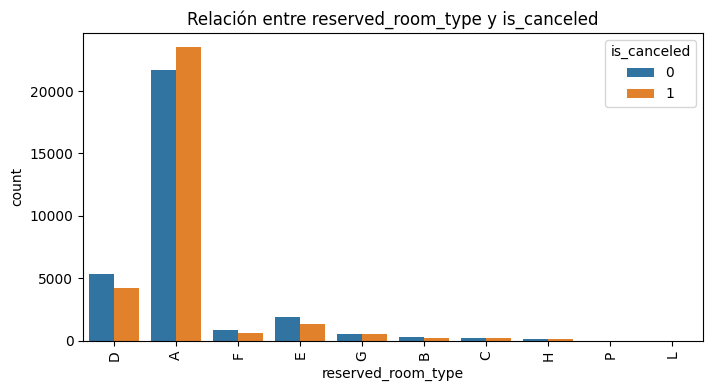

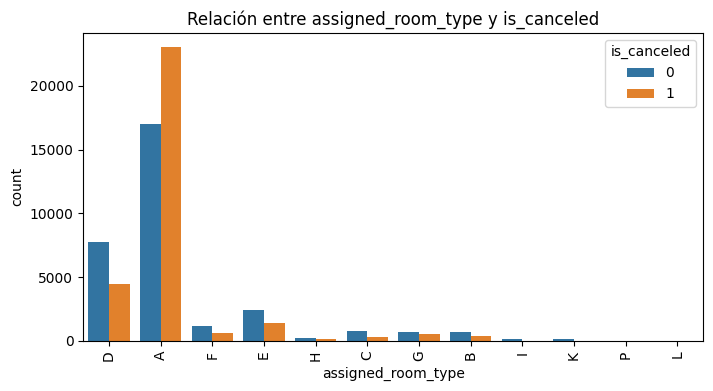

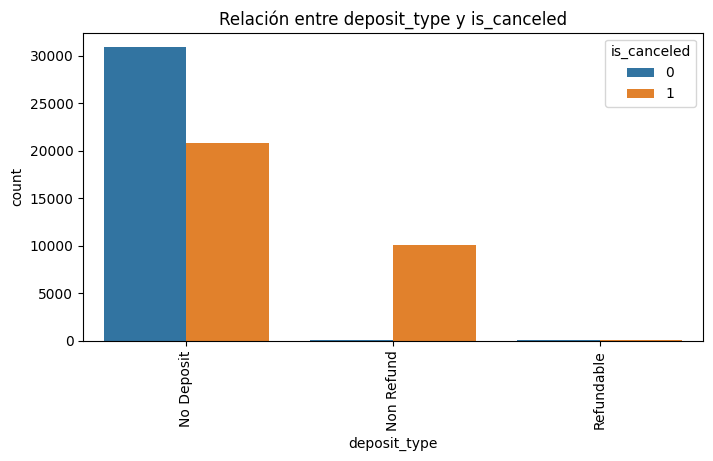

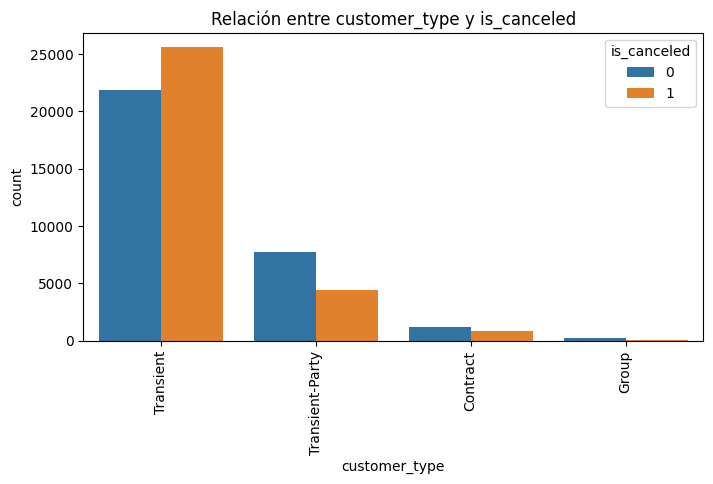

In [10]:
# Var cualitativas
df_aux = df.copy()
df_aux = df_aux.drop('id', axis=1)

variables_categoricas = df_aux.select_dtypes(include=['object'])

for columna in variables_categoricas.columns:
    if columna != 'is_canceled':
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df_aux, x=columna, hue='is_canceled')
        plt.title(f'Relación entre {columna} y is_canceled')
        plt.xticks(rotation=90)
        plt.show()

En los anteriores graficos podemos ver, la relacion de cada variable con la variable target. Esto nos ayuda a comprender cómo las variables afectan a la variable is_canceled, nos permite a futuro ayudarnos a construir modelo predictivo y guía las tendencias de este análisis .
Podemos ver algunos casos interesantes, por ejemplo, que en ciertos meses, como abril, la gente es mas propensa a cancelar, o tambien dependiendo el tipo de hotel, si es de ciudad, la gente suele cancelar mas que en uno resort

### Variables irrelevantes

  - meal
  - customer-type
  - required_car_parking_spaces

Estas variables son tras nuestro análisis y vista de correlación de variables con el target y entre ellas las que parecieran irrelevantes. Sin embargo decidimos no eliminarlas del dataset todavía ya que luego de un entrenamiento tal vez encontremos una alta influencia en el resultado en caso que haya alguna relación con otra variable que no hayamos tenido en cuenta

### Correlacion entre variables

Analizando el Heat-map encontramos que is_repetead_guest y previous_booking_not_canceled tienen un valor de correlación de 0.41 el cual nos dice que existe una cierta relación positiva.

También realizamos un primer análisis a través de un dispersograma entre las variables days_in_waiting_list y lead_time para ver la existencia de una posible correlación y calculando la correlación de pearson, filtrando por los días en los que se espero un día o más para no afectar el resultado, nos da un valor de 0.584 el cual nos confirma que existe una relación.

### Distribución de datos por variable

<Figure size 1200x800 with 0 Axes>

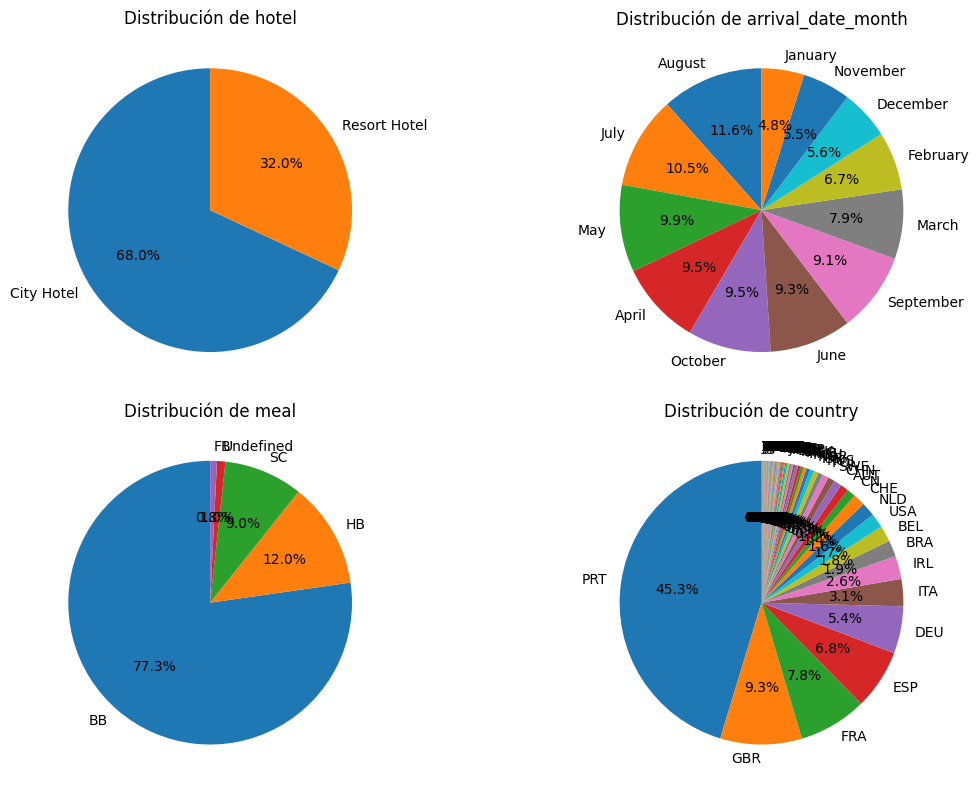

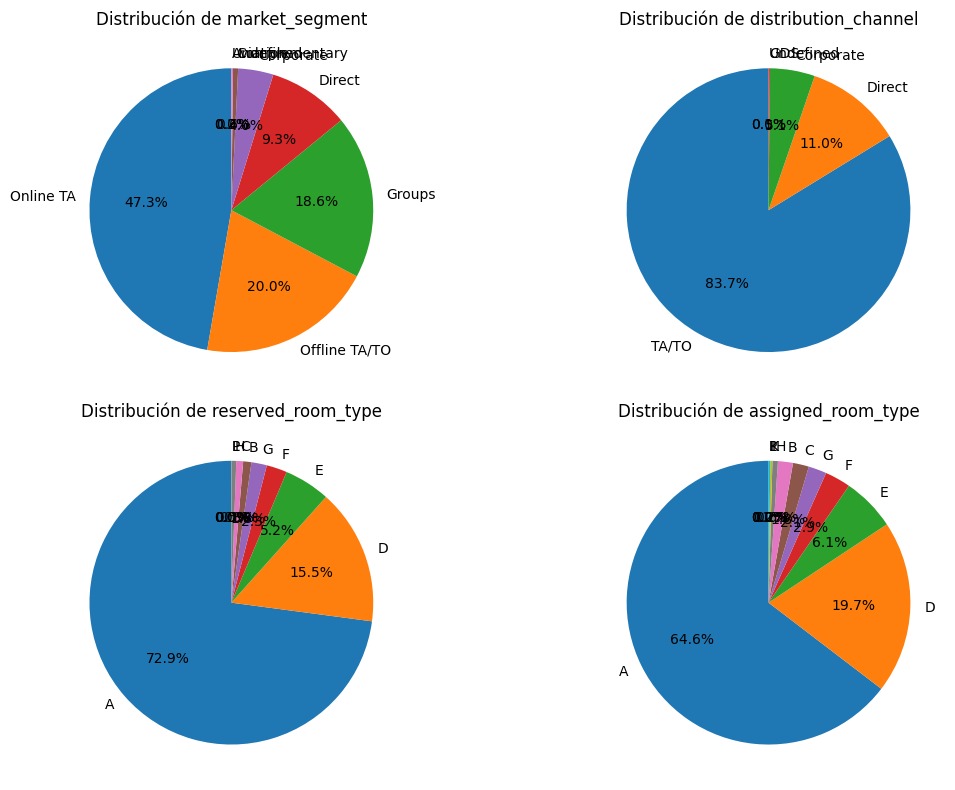

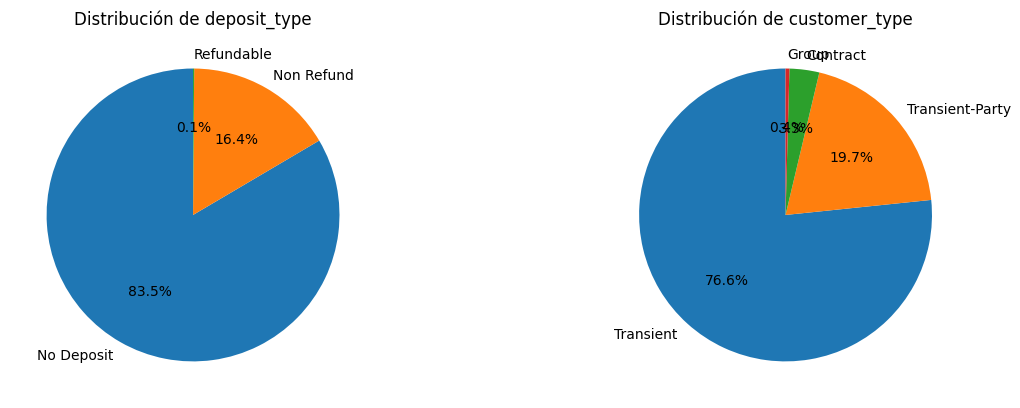

In [11]:
df_torta = df.copy()
df_torta = df_torta.drop('id', axis=1)

plt.figure(figsize=(12, 8))

variables_categoricas = df_torta.select_dtypes(include=['object'])

grupos_de_variables = [variables_categoricas.columns[i:i+4] for i in range(0, len(variables_categoricas.columns), 4)]

for grupo in grupos_de_variables:

    plt.figure(figsize=(12, 8))

    for i, columna in enumerate(grupo, 1):
        plt.subplot(2, 2, i)

        frecuencia = variables_categoricas[columna].value_counts()

        plt.pie(frecuencia, labels=frecuencia.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'Distribución de {columna}')

    plt.tight_layout()
    plt.show()

Al usar gráficos de torta, nos ayuda a representar la distribución de categorías dentro de una variable cualitativa. Nos permiten comparar fácilmente las proporciones de diferentes categorías y tambien nos ayudan aidentificar de manera visual cuáles son las categorías más predominantes o cuáles tienen una proporción significativamente mayor o menor en comparación con otras.

## Imputación de datos

#### Detección y muestra




In [12]:
filas_totales=df.shape[0]
#Mostramos el porcentaje de nulos en cada variable (columna)
print(df.isna().sum()/filas_totales*100)

hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.006461
babies                             0.000000
meal                               0.000000
country                            0.356952
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                           

Observamos que las columnas que contienen nulos son 'children', 'country', 'agent' y 'company'. Sin embargo, también vamos a buscar valores que deben ser considerados nulos para el problema (por ejemplo, valores negativos en columnas de cantidades o dias)


#####Valores inválidos numéricos


In [13]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

for columna in columnas_numericas:
    negativos_df = df[df[columna] < 0]
    if not negativos_df.empty:
        print(f"Columna '{columna}' tiene valores negativos:")
        for index, row in negativos_df.iterrows():
            print(f"Indice: {index}, valor: {row[columna]}")
        print("\n")

Columna 'adr' tiene valores negativos:
Indice: 21124, valor: -6.38




Observamos que sólo tenemos UNA fila con un valor numérico negativo que no es un valor válido en el dominio de nuestro problema. Por esto, la eliminamos de nuestro dataset de trabajo sin preocuparnos por cómo afecta el dataset.

In [14]:
adr_negativo_df = df[df['adr'] < 0]

df = df.drop(adr_negativo_df.index)

df = df.reset_index(drop=True)
#Si se corre el código de arriba se puede comprobar la correcta eliminación

#####Valores inválidos object

In [15]:
columnas_object = df.select_dtypes(include=['object', 'category']).columns
for column in columnas_object:
  print(f"Columna: {column}")
  print(df[column].unique())
  print("\n")

Columna: hotel
['City Hotel' 'Resort Hotel']


Columna: arrival_date_month
['September' 'October' 'December' 'March' 'November' 'July' 'June' 'April'
 'August' 'February' 'January' 'May']


Columna: meal
['BB' 'HB' 'SC' 'Undefined' 'FB']


Columna: country
['USA' 'PRT' 'CHE' 'FRA' 'AGO' 'GBR' 'DEU' 'ESP' 'ROU' 'SWE' 'IRL' 'CN'
 'ITA' 'NLD' 'NOR' 'MAR' 'IND' 'BEL' 'ISR' 'KOR' 'TUN' 'JPN' 'FIN' 'TUR'
 'CHN' 'AUT' 'ZAF' 'LUX' 'BRA' 'POL' 'DNK' 'IRN' 'RUS' 'VEN' 'SEN' 'AUS'
 'MLT' 'BGR' 'THA' 'GEO' 'SRB' 'PHL' 'ARG' 'LVA' 'LTU' 'ARE' nan 'VNM'
 'MOZ' 'MEX' 'HUN' 'DZA' 'GAB' 'UKR' 'SVN' 'HRV' 'SVK' 'CHL' 'BLR' 'CPV'
 'CRI' 'EST' 'TWN' 'ALB' 'SGP' 'PRI' 'IDN' 'DOM' 'MUS' 'OMN' 'EGY' 'SAU'
 'NZL' 'FRO' 'CYP' 'PER' 'CZE' 'GRC' 'ARM' 'COL' 'PAK' 'MDG' 'HKG' 'MYS'
 'MKD' 'ISL' 'BIH' 'NGA' 'AZE' 'MAC' 'JEY' 'SUR' 'KWT' 'BGD' 'IRQ' 'MDV'
 'GGY' 'VGB' 'ECU' 'URY' 'ETH' 'LBN' 'BOL' 'QAT' 'JOR' 'COM' 'GNB' 'MYT'
 'UGA' 'BEN' 'GIB' 'KAZ' 'TZA' 'LBY' 'SYC' 'PRY' 'MNE' 'ZWE' 'CAF' 'ATA'
 'MWI' 'JAM' 'AN

#####Porcentaje de nulos y inválidos

Columna 'children' tiene 0.01% nulos.
Columna 'country' tiene 0.36% nulos.
Columna 'agent' tiene 12.74% nulos.
Columna 'company' tiene 94.91% nulos.


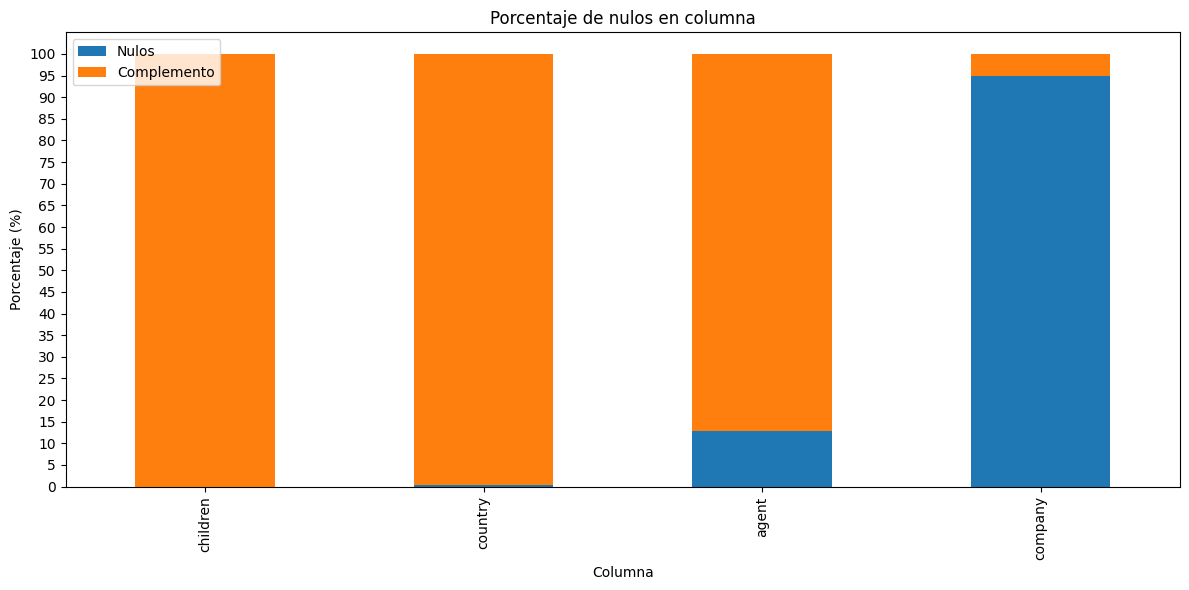

Porcentaje undefined para meal: 0.9545806951802559
Porcentaje undefined para market_segment: 0.0032303915234526423
Porcentaje undefined para distribution_channel: 0.006460783046905285


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

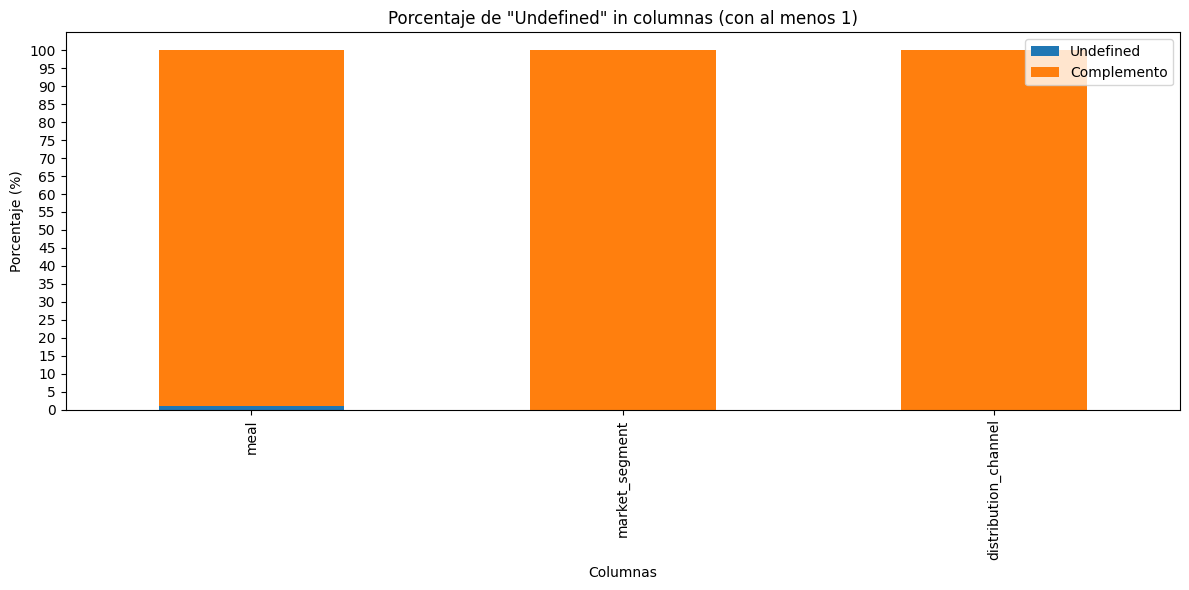

In [16]:
porcentaje_nulos = (df.isna().sum() / len(df)) * 100

columnas_con_nulos = porcentaje_nulos[porcentaje_nulos > 0].index.tolist()

complement_percentage = 100 - porcentaje_nulos

porcentajes_df = pd.DataFrame({'Nulos': porcentaje_nulos[columnas_con_nulos], 'Complemento': complement_percentage[columnas_con_nulos]})

for columna in columnas_con_nulos:
    print(f"Columna '{columna}' tiene {porcentaje_nulos[columna]:.2f}% nulos.")

ax = porcentajes_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Porcentaje de nulos en columna')
plt.xlabel('Columna')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=90)
#Cambio los ticks en y para apreciar mejor los porcentajes
ax.set_yticks(np.arange(0, 105, 5))
plt.tight_layout()
plt.show()


porcentaje_valor = {}

for column in columnas_object:
    value_count = (df[column] == 'Undefined').sum()
    if value_count > 0:  # Incluyo solo aquellas con al menos un 'Undefined'
        total_count = len(df)
        percentage = (value_count / total_count) * 100
        print(f'Porcentaje undefined para {column}: {percentage}')
        complement_percentage = 100 - percentage
        porcentaje_valor[column] = {'Undefined': percentage, 'Complemento': complement_percentage}

percentage_df = pd.DataFrame(porcentaje_valor).T

ax = percentage_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title(f'Porcentaje de "Undefined" in columnas (con al menos 1)')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=90)
plt.legend(loc='upper right', labels=['Undefined', 'Complemento'])
ax.set_yticks(np.arange(0, 105, 5))

plt.tight_layout()
plt



Para aquellos valores nulos o no definidos que no reprecenten más de un 1% de los datos, decidimos removerlos del dataset para obtener una muestra más completa y limpia

#####Tratamiento de datos nulos e inválidos



In [17]:
undefined_meals = df[df['meal'] == 'Undefined']
df = df.drop(undefined_meals.index)
df = df.reset_index(drop=True)

undefined_market_segment = df[df['market_segment'] == 'Undefined']
df = df.drop(undefined_market_segment.index)
df = df.reset_index(drop=True)

undefined_distribution_channel = df[df['distribution_channel'] == 'Undefined']
df = df.drop(undefined_distribution_channel.index)
df = df.reset_index(drop=True)

Verifico mediante la misma condición anterior para hallar undefined que ya no quedan, en caso que hubiera, se imprimiría algo tras la ejecución del siguiente bloque de código

In [18]:
for column in columnas_object:
    value_count = (df[column] == 'Undefined').sum()
    if value_count > 0:
      print(f"Quedan undefined en columna {column}")


Siguiendo la misma lógica, eliminamos las filas con nulos que representan menos del 1% de los datos totales del dataset

In [19]:
df.dropna(subset=['children', 'country'], inplace=True)

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

Columna 'agent' tiene 12.40% nulos.
Columna 'company' tiene 95.01% nulos.


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

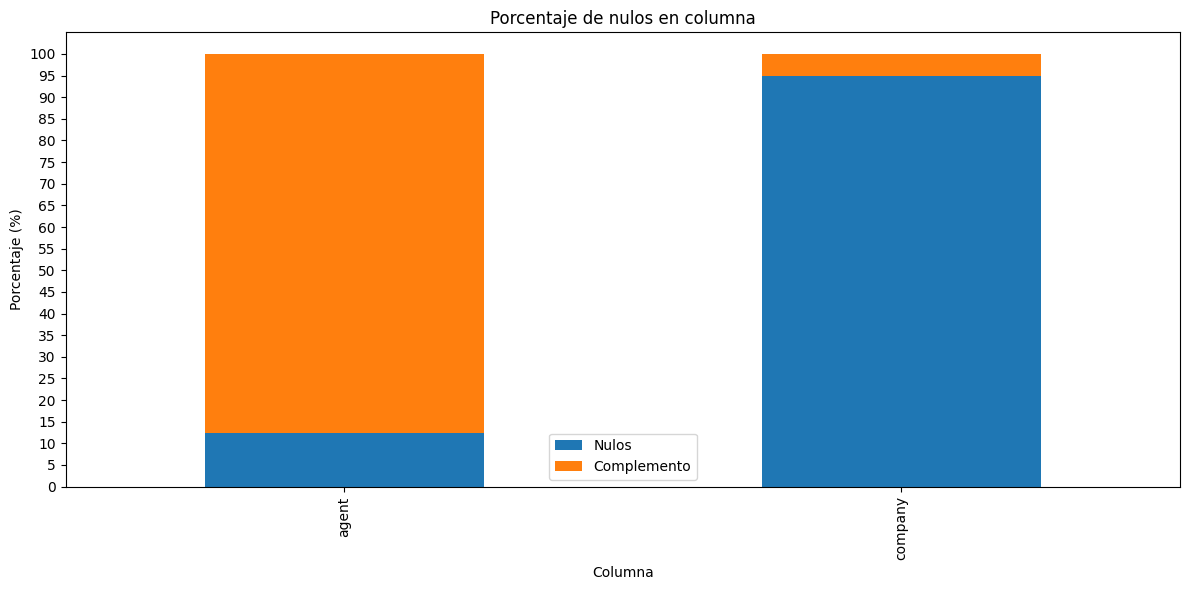

In [20]:
porcentaje_nulos = (df.isna().sum() / len(df)) * 100

columnas_con_nulos = porcentaje_nulos[porcentaje_nulos > 0].index.tolist()

complement_percentage = 100 - porcentaje_nulos

porcentajes_df = pd.DataFrame({'Nulos': porcentaje_nulos[columnas_con_nulos], 'Complemento': complement_percentage[columnas_con_nulos]})

for columna in columnas_con_nulos:
    print(f"Columna '{columna}' tiene {porcentaje_nulos[columna]:.2f}% nulos.")

ax = porcentajes_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Porcentaje de nulos en columna')
plt.xlabel('Columna')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=90)
#Cambio los ticks en y para apreciar mejor los porcentajes
ax.set_yticks(np.arange(0, 105, 5))
plt.tight_layout()
plt

Observamos que quedan sólo las columnas "agent" y "company" con valores nulos (y inválidos) en nuestro dataset. Si bien parecería obvio eliminar la columna "company" por su alto porcentaje de nulos, decidimos proceder a un análisis más exhaustivo de esta variable, para ver como afecta directamente al target. Luego procederemos de igual manera con "agent".

######company

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

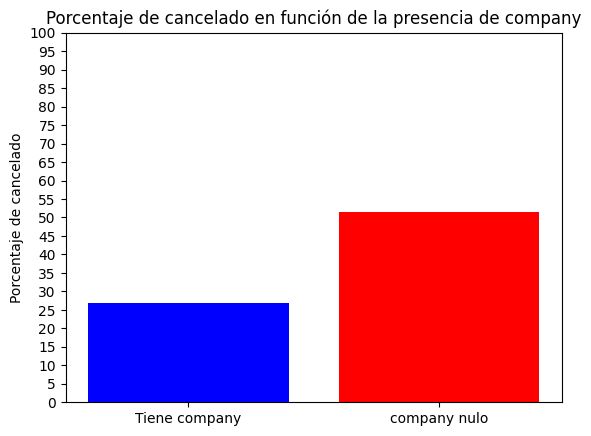

In [21]:
porcentaje_cancelado_con_compania = (df[df['company'].notna()]['is_canceled'] == True).mean() * 100

porcentaje_cancelado_sin_compania = (df[df['company'].isna()]['is_canceled'] == True).mean() * 100

plt.bar(['Tiene company', 'company nulo'], [porcentaje_cancelado_con_compania, porcentaje_cancelado_sin_compania], color=['blue', 'red'])
plt.ylabel('Porcentaje de cancelado')
plt.title('Porcentaje de cancelado en función de la presencia de company')
y_ticks = range(0, 101, 5)
plt.yticks(y_ticks)
plt.ylim(0, 100)
plt

Parecería, al hacer una comparación directa con el target, que la presencia o no de un company afecta el resultado. Analizamos si la compania en particular pareciera afectar el resultado o si la mera presencia de alguna es lo que cambia.

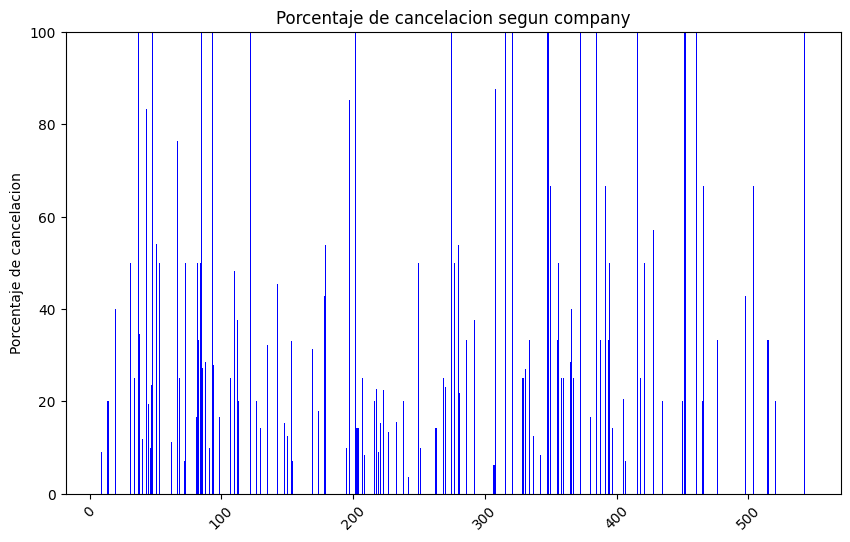

Company unicas: 272
Cantidad de filas de company con 100% de cancelación: 16
company
100.0    1
100.0    1
100.0    1
100.0    1
100.0    1
100.0    1
100.0    1
100.0    1
100.0    1
100.0    1
100.0    1
100.0    1
100.0    1
100.0    1
100.0    1
100.0    1
dtype: int64


In [22]:
porcentaje_cancelado_por_compania = df.groupby('company')['is_canceled'].mean() * 100
plt.figure(figsize=(10, 6))
plt.bar(porcentaje_cancelado_por_compania.index, porcentaje_cancelado_por_compania.values, color='blue')
plt.ylabel('Porcentaje de cancelacion')
plt.title('Porcentaje de cancelacion segun company')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()

#Quiero imprimir la cantidad de filas para aquellas company que tienen 100% de cancelación
cancelado_en_totalidad = porcentaje_cancelado_por_compania[porcentaje_cancelado_por_compania == 100]
cancelado_en_totalidad_filas = df.groupby('company').size()[cancelado_en_totalidad]
print('Company unicas:', (len(df['company'].unique()) - 1)) #quito el NaN
print(f'Cantidad de filas de company con 100% de cancelación: {cancelado_en_totalidad_filas.size}')
print(cancelado_en_totalidad_filas)

Observamos que aquellas columnas del gráfico que tienen un 100% (o sea las companias con 100% de cancelación) son solo 16 de 272 y para cada una, sólo hay una fila de esta compañia en particular. Esto nos hace pensar que si bien cual es la compania afecta, el factor que más influencia el resultado en un análisis 1 a 1 es la presencia o no de una company. Concluimos que para nuestros datos, nos conviene mantener la columna pero transformando la columna a un binario que indique o no si hay compañia.

In [23]:
df['is_company'] = df['company'].notnull()

df['is_company'] = df['is_company'].astype(bool)

df.drop('company', axis=1, inplace=True)

df.rename(columns={'is_company': 'company'}, inplace=True)

In [24]:
df['company'].value_counts()

False    58049
True      3048
Name: company, dtype: int64

In [25]:
df.shape #Verifico que la suma de estos sean coincidentes con el total de filas del df

(61097, 31)

######agent

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

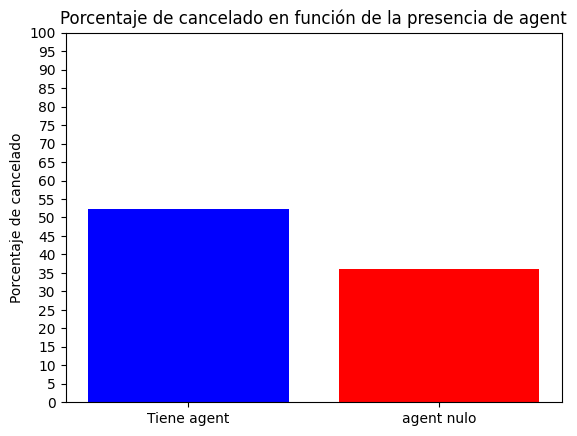

In [26]:
porcentaje_cancelado_con_agent = (df[df['agent'].notna()]['is_canceled'] == True).mean() * 100

porcentaje_cancelado_sin_agent = (df[df['agent'].isna()]['is_canceled'] == True).mean() * 100

plt.bar(['Tiene agent', 'agent nulo'], [porcentaje_cancelado_con_agent, porcentaje_cancelado_sin_agent], color=['blue', 'red'])
plt.ylabel('Porcentaje de cancelado')
plt.title('Porcentaje de cancelado en función de la presencia de agent')
y_ticks = range(0, 101, 5)
plt.yticks(y_ticks)
plt.ylim(0, 100)
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

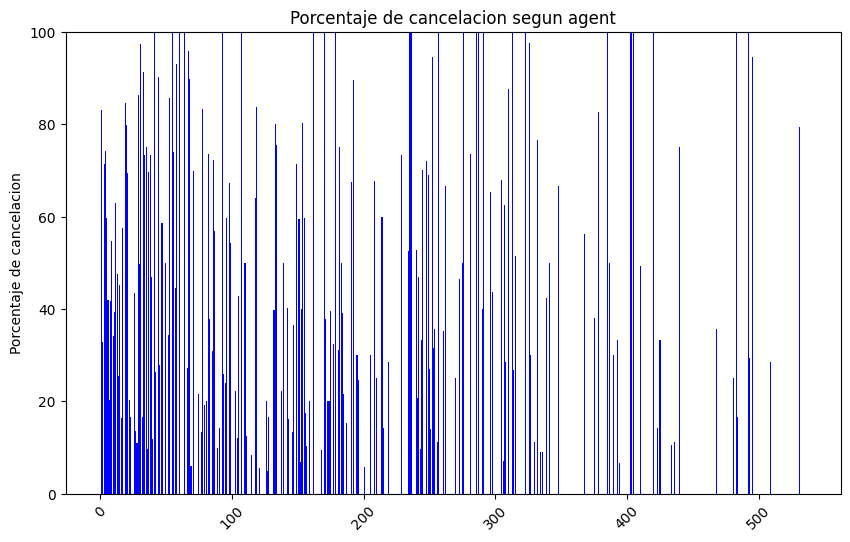

In [27]:
porcentaje_cancelado_por_agente = df.groupby('agent')['is_canceled'].mean() * 100
plt.figure(figsize=(10, 6))
plt.bar(porcentaje_cancelado_por_agente.index, porcentaje_cancelado_por_agente.values, color='blue')
plt.ylabel('Porcentaje de cancelacion')
plt.title('Porcentaje de cancelacion segun agent')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt

In [28]:
df['agent'].value_counts()

9.0      17002
240.0     7359
1.0       4424
14.0      1698
6.0       1634
         ...  
269.0        1
303.0        1
352.0        1
450.0        1
25.0         1
Name: agent, Length: 293, dtype: int64

Vemos que la columna agent, al igual que company tiene un porcentaje de cancelacion distinto de los valores nulos a los establecidos aunque menos diferenciante. Sin embargo, al ser en este caso el porcentaje más chico y al haber numerosas filas con el mismo agente (como se ve encima), no nos parece correcto aplicar los mismos cambios a la columna porque estaríamos perdiendo información sobre cómo cada agente está relacionado con las cancelaciones directamente. Además, al todavía tener nulos, si bien podríamos dejar los datos como estan, esto formaría un grupo que puede afectar las predicciones del modelo en el sentido de como afecta la predicción para un grupo de filas con el mismo agente. Por esto, decidimos asignarle a los campos de agente nulo, el id de la fila en que se encuentran, de esta manera nos aseguramos que cada uno sea distinto y no agrupable para el entrenamiento, manteniendo asi la importancia del agrupamiento de filas con el mismo agente.

In [29]:
df['agent'] = df.apply(lambda row: row['id'] if pd.isna(row['agent']) else row['agent'], axis=1)

In [30]:
porcentaje_nulos = (df.isna().sum() / len(df)) * 100

columnas_con_nulos = porcentaje_nulos[porcentaje_nulos > 0].index.tolist()

complement_percentage = 100 - porcentaje_nulos

porcentajes_df = pd.DataFrame({'Nulos': porcentaje_nulos[columnas_con_nulos], 'Complemento': complement_percentage[columnas_con_nulos]})

for columna in columnas_con_nulos: #no imprime nada es porque no quedan nulos
    print(f"Columna '{columna}' tiene {porcentaje_nulos[columna]:.2f}% nulos.")

## Análisis de datos

Si bien se presenta esta como una nueva sección, vale destacar que ya se modificaron las columnas company y agent. A continuación analizaremos y modificaremos otras columnas en función de los resultados hallados en caso de ser beneficioso.

#####Modificación de tipos

Para cada columna observaremos valores posibles y transformaremos a tipos de datos más correctos para el análisis. Comenzaremos por las variables tipo 'object' que en caso de tener reducida cantidad de valores posibles, las pasaremos a tipo 'category' para luego ser interpretadas con mayor facilidad por el modelo

In [31]:
df['hotel'].unique()

array(['City Hotel', 'Resort Hotel'], dtype=object)

In [32]:
df['meal'].unique()

array(['BB', 'HB', 'SC', 'FB'], dtype=object)

In [33]:
df['country'].unique()

array(['USA', 'PRT', 'CHE', 'FRA', 'AGO', 'GBR', 'DEU', 'ESP', 'ROU',
       'SWE', 'IRL', 'CN', 'ITA', 'NLD', 'NOR', 'MAR', 'IND', 'BEL',
       'ISR', 'KOR', 'TUN', 'JPN', 'FIN', 'TUR', 'CHN', 'AUT', 'ZAF',
       'LUX', 'BRA', 'POL', 'DNK', 'IRN', 'RUS', 'VEN', 'SEN', 'AUS',
       'MLT', 'BGR', 'THA', 'GEO', 'SRB', 'PHL', 'ARG', 'LVA', 'LTU',
       'ARE', 'VNM', 'MOZ', 'MEX', 'HUN', 'DZA', 'GAB', 'UKR', 'SVN',
       'HRV', 'SVK', 'CHL', 'BLR', 'CPV', 'CRI', 'EST', 'TWN', 'ALB',
       'SGP', 'PRI', 'IDN', 'DOM', 'MUS', 'OMN', 'EGY', 'SAU', 'NZL',
       'FRO', 'CYP', 'PER', 'CZE', 'GRC', 'ARM', 'COL', 'PAK', 'MDG',
       'HKG', 'MYS', 'MKD', 'ISL', 'BIH', 'NGA', 'AZE', 'MAC', 'JEY',
       'SUR', 'KWT', 'BGD', 'IRQ', 'MDV', 'GGY', 'VGB', 'ECU', 'URY',
       'ETH', 'LBN', 'BOL', 'QAT', 'JOR', 'COM', 'GNB', 'MYT', 'UGA',
       'BEN', 'GIB', 'KAZ', 'TZA', 'LBY', 'SYC', 'PRY', 'MNE', 'ZWE',
       'CAF', 'ATA', 'MWI', 'JAM', 'AND', 'LIE', 'FJI', 'TJK', 'LKA',
       'HND', 'PAN', 

In [34]:
df['market_segment'].unique()

array(['Online TA', 'Groups', 'Offline TA/TO', 'Direct', 'Complementary',
       'Corporate', 'Aviation'], dtype=object)

In [35]:
df['distribution_channel'].unique()

array(['TA/TO', 'Direct', 'Corporate', 'GDS'], dtype=object)

In [36]:
df['reserved_room_type'].unique()

array(['D', 'A', 'F', 'E', 'G', 'B', 'C', 'H', 'P', 'L'], dtype=object)

In [37]:
df['assigned_room_type'].unique()

array(['D', 'A', 'F', 'E', 'H', 'C', 'G', 'B', 'I', 'K', 'P', 'L'],
      dtype=object)

In [38]:
df['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [39]:
df['customer_type'].unique()

array(['Transient', 'Transient-Party', 'Contract', 'Group'], dtype=object)

Observamos que todas estas variables tienen valores posibles acotados y definidos, por esto decidimos pasarlas a tipo categóricas

In [40]:
df['hotel'] = df['hotel'].astype('category')
df['meal'] = df['meal'].astype('category')
df['country'] = df['country'].astype('category')
df['market_segment'] = df['market_segment'].astype('category')
df['distribution_channel'] = df['distribution_channel'].astype('category')
df['reserved_room_type'] = df['reserved_room_type'].astype('category')
df['assigned_room_type'] = df['assigned_room_type'].astype('category')
df['deposit_type'] = df['deposit_type'].astype('category')
df['customer_type'] = df['customer_type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61097 entries, 0 to 61096
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           61097 non-null  category
 1   lead_time                       61097 non-null  int64   
 2   arrival_date_year               61097 non-null  int64   
 3   arrival_date_month              61097 non-null  object  
 4   arrival_date_week_number        61097 non-null  int64   
 5   arrival_date_day_of_month       61097 non-null  int64   
 6   stays_in_weekend_nights         61097 non-null  int64   
 7   stays_in_week_nights            61097 non-null  int64   
 8   adults                          61097 non-null  int64   
 9   children                        61097 non-null  float64 
 10  babies                          61097 non-null  int64   
 11  meal                            61097 non-null  category
 12  country           

Como observación vemos que el espacio ocupado por el dataset se redujo 4MB, lo cual es significativo. Procedemos con variables que sabemos podrían considerarse booleanas (en este caso sólo is_repeated_guest y la ya analizada company). OBS: Podríamos tambien cambiar el tipo de is_canceled pero no queremos modificar el target y tampoco afectará al análisis ya que es la categorización a definir.

In [41]:
df['is_repeated_guest'].value_counts()

0    59385
1     1712
Name: is_repeated_guest, dtype: int64

In [42]:
df['is_repeated_guest'] = df['is_repeated_guest'].astype(bool)
df['is_repeated_guest'].value_counts()

False    59385
True      1712
Name: is_repeated_guest, dtype: int64

#####Fecha de reserva

Observamos que hay varias columnas referidas a la fecha de la reserva. Sin embargo procedemos a analizar si alguna de las columnas es redundante o posible de simplificar.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

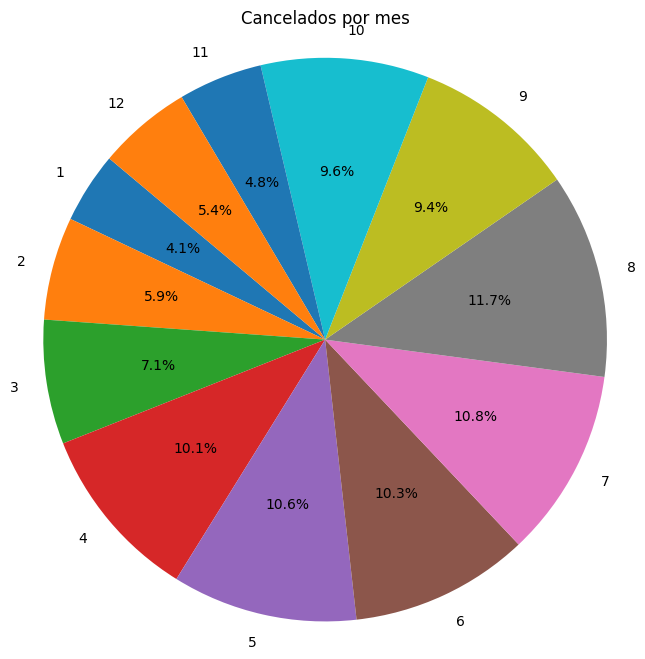

In [43]:
mes_a_numero = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June' : 6,
    'July' : 7,
    'August' : 8,
    'September' : 9,
    'October' : 10,
    'November' : 11,
    'December' : 12
}

df['arrival_date_month'] = df['arrival_date_month'].map(mes_a_numero)

cantidad_cancelados_mes = df[df['is_canceled'] == 1].groupby('arrival_date_month').size()

plt.figure(figsize=(8, 8))
plt.pie(cantidad_cancelados_mes, labels=cantidad_cancelados_mes.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Cancelados por mes')

plt

Se ve que hay mayor cantidad de cancelados por mes en algunos que otros, parecería que se agrupan por rangos de meses, tal vez por temporadas. Sin embargo tambíen hay que analizar el porcentaje antes de tomar decisiones.

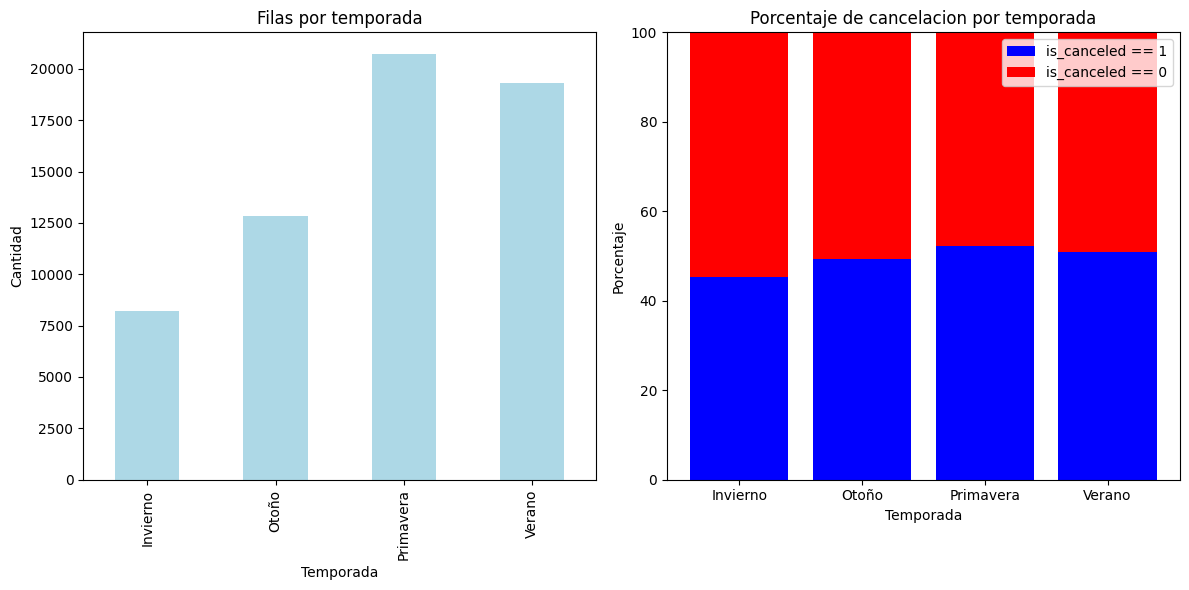

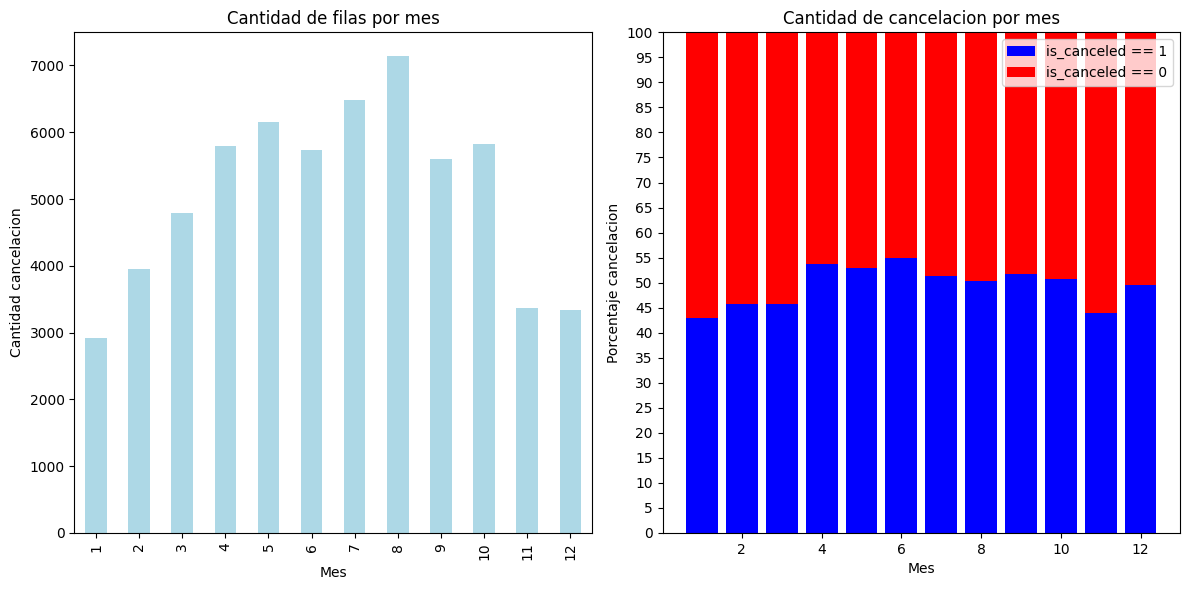

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

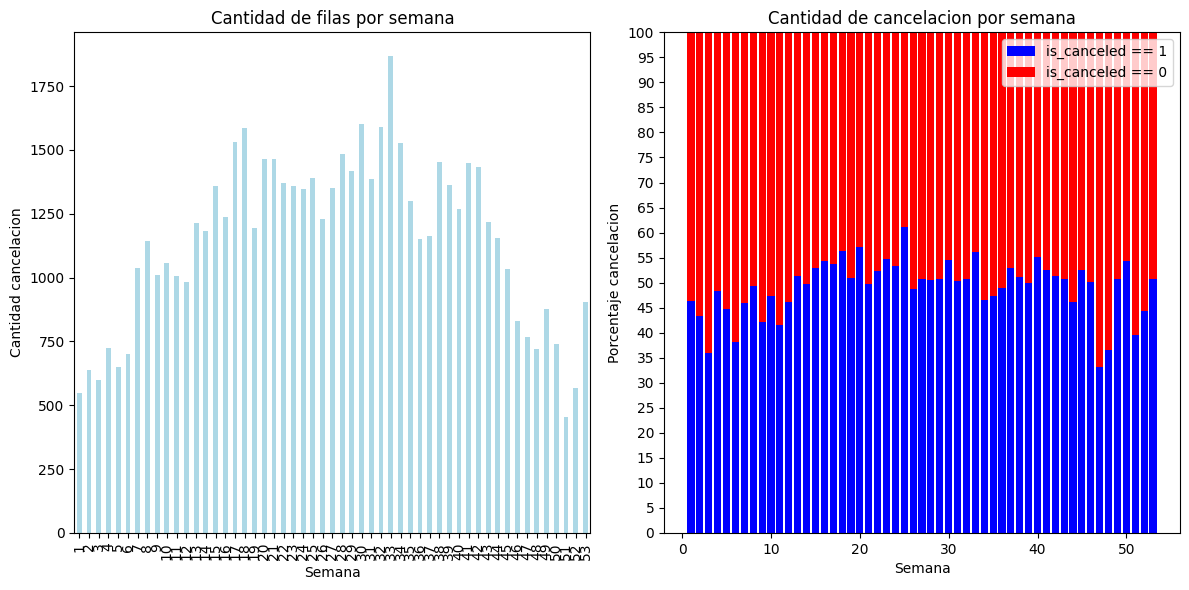

In [44]:
def categorizar_a_temporada(row): #estaciones en portugal
    mes = row['arrival_date_month']
    if (mes >= 3 and mes < 6) or (mes == 6 and row['arrival_date_day_of_month'] < 21):
        return 'Primavera'
    elif (mes >= 6 and mes < 9) or (mes == 9 and row['arrival_date_day_of_month'] < 22):
        return 'Verano'
    elif (mes >= 9 and mes < 12) or (mes == 12 and row['arrival_date_day_of_month'] < 21):
        return 'Otoño'
    else:
        return 'Invierno'

df_meses_con_temporada = df.copy()
df_meses_con_temporada['season'] = df_meses_con_temporada.apply(categorizar_a_temporada, axis=1)

cantidad_estaciones = df_meses_con_temporada.groupby('season').size() #No usamos directamente el 4 por el caso en que no haya filas en alguna de las estaciones

porcentaje_cancelacion_temporada = df_meses_con_temporada[df_meses_con_temporada['is_canceled'] == 1].groupby('season').size() / cantidad_estaciones * 100

porcentaje_no_cancelado_temporada = 100 - porcentaje_cancelacion_temporada

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
cantidad_estaciones.plot(kind='bar', color='lightblue')
plt.xlabel('Temporada')
plt.ylabel('Cantidad')
plt.title('Filas por temporada')

plt.subplot(1, 2, 2)
plt.bar(porcentaje_cancelacion_temporada.index, porcentaje_cancelacion_temporada, label='is_canceled == 1', color='blue')
plt.bar(porcentaje_no_cancelado_temporada.index, porcentaje_no_cancelado_temporada, label='is_canceled == 0', bottom=porcentaje_cancelacion_temporada, color='red')
plt.xlabel('Temporada')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de cancelacion por temporada')
y_ticks = range(0, 101, 5)
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()

cantidad_meses = df_meses_con_temporada.groupby('arrival_date_month').size()

porcentaje_cancelacion_mes = df_meses_con_temporada[df_meses_con_temporada['is_canceled'] == 1].groupby('arrival_date_month').size() / cantidad_meses * 100

porcentaje_no_cancelado_mes = 100 - porcentaje_cancelacion_mes

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
cantidad_meses.plot(kind='bar', color='lightblue')
plt.xlabel('Mes')
plt.ylabel('Cantidad cancelacion')
plt.title('Cantidad de filas por mes')

plt.subplot(1, 2, 2)
plt.bar(porcentaje_cancelacion_mes.index, porcentaje_cancelacion_mes, label='is_canceled == 1', color='blue')
plt.bar(porcentaje_no_cancelado_mes.index, porcentaje_no_cancelado_mes, label='is_canceled == 0', bottom=porcentaje_cancelacion_mes, color='red')
plt.xlabel('Mes')
plt.ylabel('Porcentaje cancelacion')
plt.title('Cantidad de cancelacion por mes')
y_ticks = range(0, 101, 5)
plt.yticks(y_ticks)
plt.ylim(0, 100)
plt.legend()

plt.tight_layout()
plt.show()

cantidad_semanas = df_meses_con_temporada.groupby('arrival_date_week_number').size()

porcentaje_cancelacion_semanas = df_meses_con_temporada[df_meses_con_temporada['is_canceled'] == 1].groupby('arrival_date_week_number').size() / cantidad_semanas * 100

porcentaje_no_cancelado_semanas = 100 - porcentaje_cancelacion_semanas

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
cantidad_semanas.plot(kind='bar', color='lightblue')
plt.xlabel('Semana')
plt.ylabel('Cantidad cancelacion')
plt.title('Cantidad de filas por semana')

plt.subplot(1, 2, 2)
plt.bar(porcentaje_cancelacion_semanas.index, porcentaje_cancelacion_semanas, label='is_canceled == 1', color='blue')
plt.bar(porcentaje_no_cancelado_semanas.index, porcentaje_no_cancelado_semanas, label='is_canceled == 0', bottom=porcentaje_cancelacion_semanas, color='red')
plt.xlabel('Semana')
plt.ylabel('Porcentaje cancelacion')
plt.title('Cantidad de cancelacion por semana')
y_ticks = range(0, 101, 5)
plt.yticks(y_ticks)
plt.ylim(0, 100)
plt.legend()

plt.tight_layout()
plt

Observamos que a mayor granularidad de los datos, la variación del porcentaje de cancelación aumenta. Es decir, al agrupar por estaciones notamos una tendencia de los porcentajes, que se respeta tanto en meses como también en semanas, y luego observaremos el caso de los días. Al tener más subdivisiones, si bien se pierde generalización, consideramos más valiosa las características particulares que nos brinda por ejemplo las 4 primeras semanas del año que la generalización del primer mes.

Habiendo observado esto, analizamos la cantidad de datos por día para ver si la cantidad es suficientemente sustancial para ameritar un análisis particular

In [45]:
datos_por_dia = pd.DataFrame()
datos_por_dia['cantidad'] = df_meses_con_temporada.groupby(['arrival_date_month', 'arrival_date_day_of_month']).count()['hotel']
datos_por_dia['cantidad'].to_frame()

cantidad
arrival_date_month arrival_date_day_of_month          
1                  1                                92
                   2                               194
                   3                                99
                   4                                88
                   5                                61
...                                                ...
12                 27                              168
                   28                              131
                   29                              172
                   30                              199
                   31                               98

[366 rows x 1 columns]

In [46]:
datos_por_dia[(datos_por_dia['cantidad'] < 60)]['cantidad'].to_frame()

cantidad
arrival_date_month arrival_date_day_of_month          
1                  11                               45
                   17                               42
                   24                               45
                   31                               42
2                  29                               54
11                 15                               52
                   22                               54
                   29                               57
                   30                               46
12                 11                               37
                   13                               45
                   14                               53
                   18                               45
                   20                               59
                   21                               53

Observamos que agrupando por mes, la cantidad de reservas por dia hay como mínimo 37 datos, consideramos que esta cantidad de datos es suficiente para ameritar un análisis más profundo ya que no entraremos en el conflicto que el modelo se adapte a sólo uno o dos casos de uso. Observemos el porcentaje de cancelación por día agrupando por mes

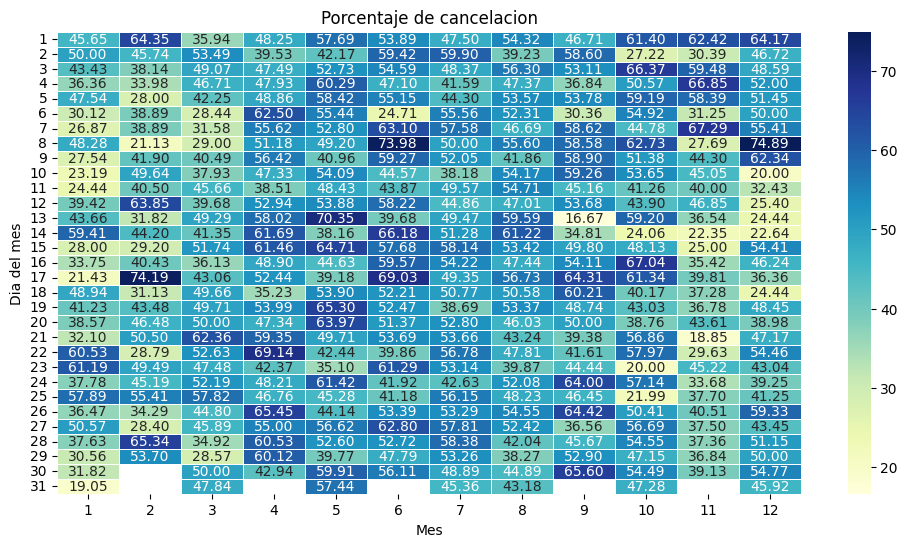

In [47]:
pivot_table = df_meses_con_temporada.groupby(['arrival_date_month', 'arrival_date_day_of_month'])['is_canceled'].sum().reset_index()
pivot_table_total = df_meses_con_temporada.groupby(['arrival_date_month', 'arrival_date_day_of_month'])['is_canceled'].count().reset_index()

heatmap_data = pivot_table.pivot('arrival_date_day_of_month', 'arrival_date_month', 'is_canceled')
heatmap_data_total = pivot_table_total.pivot('arrival_date_day_of_month', 'arrival_date_month', 'is_canceled')

porcentaje_cancelaciones = (heatmap_data.T / heatmap_data_total.T).T * 100

plt.figure(figsize=(12, 6))
sns.heatmap(porcentaje_cancelaciones, cmap="YlGnBu", annot=True, fmt='.2f', linewidths=.5)
plt.xlabel('Mes')
plt.ylabel('Dia del mes')
plt.title('Porcentaje de cancelacion')

plt.show()

Observamos que la distribución de porcentaje de cancelación por dia no parece seguir un patrón definido dentro de cada mes, lo que si se observa es el aumento del porcentaje entre los meses 4 y 10 tal como marca el gráfico anterior a este. Debido a esto, decidimos mantener y analizar teniendo en cuenta los días, desfavoreciendo la generalización pero manteniendo la particularidad de las observaciones y no temiendo al overfitting por tener numerosas observaciones para cada día con distintos resultados (sin tener en cuenta otras variables por lo pronto)

#####Reasignación de habitación

A continuación analizaremos cómo la reasignación de una habitación afecta a la cancelación de la reserva de forma directa

In [48]:
df_habitaciones = df[['reserved_room_type', 'assigned_room_type', 'is_canceled']]

# mantuvo_habitaciones_df = df[df['reserved_room_type'] == df['assigned_room_type']]
# cambio_habitaciones_df = df[df['reserved_room_type'] != df['assigned_room_type']]
mantuvo_habitaciones_df = df[df.apply(lambda row : row['reserved_room_type'] == row['assigned_room_type'], axis=1)]
cambio_habitaciones_df = df[df.apply(lambda row : row['reserved_room_type'] != row['assigned_room_type'], axis=1)]

print(mantuvo_habitaciones_df.shape[0])
print(cambio_habitaciones_df.shape[0])

54846
6251


Observamos que la cantidad de cambios de habitaciones es baja en relación a las que no fueron cambiadas, sin embargo, lo consideramos significativo como para su análisis

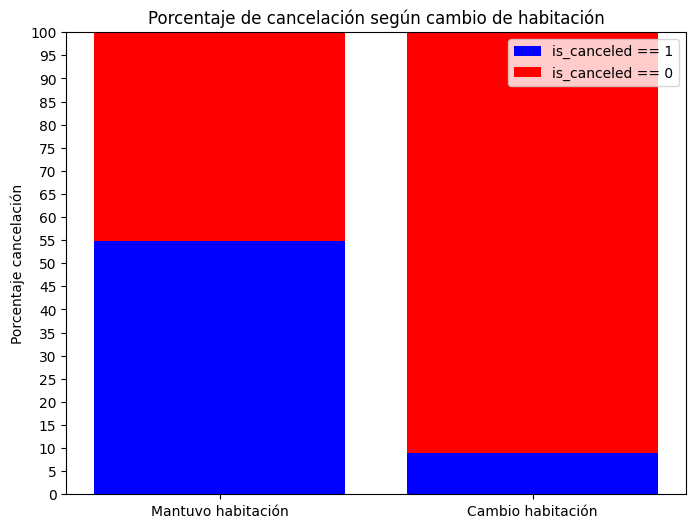

In [49]:
porcentaje_cancelado_mantuvo_habitacion = (mantuvo_habitaciones_df['is_canceled'] == 1).mean() * 100
porcentaje_cancelado_cambio_habitacion = (cambio_habitaciones_df['is_canceled'] == 1).mean() * 100

porcentaje_no_cancelado_mantuvo = 100 - porcentaje_cancelado_mantuvo_habitacion
porcentaje_no_cancelado_cambio = 100 - porcentaje_cancelado_cambio_habitacion

plt.figure(figsize=(8, 6))
plt.bar(['Mantuvo habitación', 'Cambio habitación'], [porcentaje_cancelado_mantuvo_habitacion, porcentaje_cancelado_cambio_habitacion], label='is_canceled == 1', color='blue')
plt.bar(['Mantuvo habitación', 'Cambio habitación'], [porcentaje_no_cancelado_mantuvo, porcentaje_no_cancelado_cambio], bottom=[porcentaje_cancelado_mantuvo_habitacion, porcentaje_cancelado_cambio_habitacion], label='is_canceled == 0', color='red')
plt.ylabel('Porcentaje cancelación')
plt.title('Porcentaje de cancelación según cambio de habitación')
y_ticks = range(0, 101, 5)
plt.yticks(y_ticks)
plt.ylim(0, 100)
plt.legend()

Observamos que para aquellas ocasiones en que fue reasignada una habitación, el porcentaje de cancelación es muy bajo, por este motivo decidimos agregar una columna que booleana que represente este cambio.

In [ ]:
df['room_changed'] = df.apply(lambda row : row['reserved_room_type'] != row['assigned_room_type'], axis=1)
df['room_changed'].value_counts() #Verificamos que se mantiene la cantidad de registros

A continuación analizaremos si la relación reservada - asignada tras una cancelación es distintiva de forma muy obvia para cada caso



In [ ]:
#genero dos columnas de agregación para poder generar cómodamente los porcentajes y el heatmap luego
agrupado_cambio = cambio_habitaciones_df.groupby(['assigned_room_type', 'reserved_room_type']).agg({'is_canceled' : ['count', 'sum']}).reset_index()
agrupado_cambio['porcentaje_cancelacion'] = agrupado_cambio['is_canceled']['sum'] * 100 / agrupado_cambio['is_canceled']['count']
agrupado_cambio

heatmap_data = agrupado_cambio.pivot('assigned_room_type', 'reserved_room_type', 'porcentaje_cancelacion')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='.2f', linewidths=.5)
plt.xlabel('Reservada')
plt.ylabel('Asignada')
plt.title('Porcentaje de cancelacion tras reasignacion')

plt.show()

## Valores atípicos

#### Detección de valores atípicos

###### Univariados

In [ ]:
# Creo un df solo con los tipos numericos
df_val_num = df.select_dtypes(exclude=['object', 'category'])

# Borro columnas que no son cuantitativas (columnas con fechas y con valores 0 y 1)
col_to_drop = ['arrival_date_year', 'arrival_date_week_number','arrival_date_day_of_month', 'arrival_date_month', 'is_repeated_guest', 'company', 'is_canceled', 'room_changed']
df_val_atipicos = df_val_num.drop(col_to_drop,axis='columns')

for col in df_val_atipicos.columns:
  plt.figure(figsize=(10, 4))
  sns.boxplot(x=df[col])
  plt.show()
  print('\n')

Analizando los diferentes Box-Plots encontramos que existen outliers univariados en las variables:

- stays_in_weekend_nights
- stays_in_week_nights
- adults
- children
- babies
- previous_cancellations
- days_in_waiting_list
- required_car_parking_spaces

Analizamos aquellos casos donde se hospedaban mas de 35 noches de dia semana y mas de 14 noches de fin de semana

In [ ]:
df[(df['stays_in_week_nights'] > 35) & (df['stays_in_weekend_nights'] > 14)]

Al ser solo un caso de este tipo de estadía y teniendo en cuenta que correponde a un tiempo de de dos meses, decidimos que no corresponde a un valor atípico para el problema y por lo tanto no lo eliminaremos.

Analizamos los casos donde los adultos eran 0 (ningún adulto) o una cantidad mayor a 15

In [ ]:
df[df['adults'] == 0].shape

Como consideramos que la reserva debe estar hecha por lo menos para un adulto, procedemos a eliminar todos los registros que no tengan alguno.

In [ ]:
indices = df[df['adults'] == 0].index
df.drop(indices, inplace=True)

In [ ]:
df[df['adults'] > 15]

In [ ]:
indices = df[df['adults'] > 15].index
df.drop(indices, inplace=True)

Detectamos que todas las reservas hechas para 20 o mas adultos fueron canceladas. Igualmente, como se trata de tan solo 7 casos procedemos a eliminarlos

Analizamos los casos donde la cantidad de niños y bebes registrados es mayor a 6

In [ ]:
df[df['children'] > 6]

Como se trata de un solo caso procedemos a eliminarlo

In [ ]:
indices = df[df['children'] > 6].index
df.drop(indices, inplace=True)

In [ ]:
df[df['babies'] > 6]

Como también se trata de un solo caso procedemos a eliminarlo

In [ ]:
indices = df[df['babies'] > 6].index
df.drop(indices, inplace=True)

Analizamos los casos donde el usuario que realizo la reserva tenia mas de 10 cancelaciónes previas

In [ ]:
df[df['previous_cancellations'] > 10]

In [ ]:
df[(df['previous_cancellations'] > 10) & df['is_canceled']].shape

Notamos que hay 125 reservas con mas de 10 cancelaciones previas, y comparando estas con si fue cancelada o no, vemos que la mayoría si fueron canceladas (116 de 125) y en principio habría una correlación entre ambas por lo tanto decidimos no eliminar estos registros

Analizamos los casos en los que se estuvo mas de 300 días en lista de espera

In [ ]:
df[df['days_in_waiting_list'] > 300]

In [ ]:
df[(df['days_in_waiting_list'] > 300) & df['is_canceled']].shape

In [ ]:
df[df['days_in_waiting_list'] > 350].shape

In [ ]:
df[(df['days_in_waiting_list'] > 350) & df['is_canceled']].shape

Notamos que hay 45 casos en los que se estuvo más de 300 días en lista de espera, de los cuales 38 fueron cancelados.
Haciendo un análisis extra teniendo en cuenta los registros que estuvieron más de 350 días en lista de espera, notamos que en estos casos casi todos fueron cancelados (37 de 38), por lo que en principio podría haber una correlación entre ambas variables. Por lo tanto, decidimos no eliminar estos registros

###### Multivaríados

Definición funciones de mahalanobis para 2 y 3 variables

In [ ]:
def calculate_mahalanobis_distance_2v(dataset, col1, col2):
    X = dataset[[f'{col1}', f'{col2}']].copy()
    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]

    return X

def calculate_mahalanobis_distance_3v(dataset, col1, col2, col3):
    X = dataset[[f'{col1}', f'{col2}', f'{col3}']].copy()
    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]

    return X

Analisís dos variables

In [ ]:
#Scatter Plot
df_resumido = df[df['days_in_waiting_list'] > 0]
plt.scatter(df_resumido.days_in_waiting_list, df_resumido.lead_time)
plt.title('Dispersograma days_in_waiting_list vs lead_time')
plt.xlabel('days_in_waiting_list')
plt.ylabel('lead_time')
plt.show()

In [ ]:
df_multivariado = calculate_mahalanobis_distance_2v(df_resumido, 'days_in_waiting_list', 'lead_time')

In [ ]:
sns.boxplot(y=df_multivariado.mahalanobis)

In [ ]:
#Defino umbral
umbral=15

#Observacione anómalas
df_multivariado[df_multivariado['mahalanobis']>umbral]

In [ ]:
#Grafico scatter
es_outlier = (df_multivariado['mahalanobis'] > umbral)

sns.scatterplot(x=df_multivariado.days_in_waiting_list,y=df_multivariado.lead_time, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma vs ')
plt.show()

Analisís con tres variables

Analizamos la relación entre las variables adultos, niños y bebes para ver si existen casos donde la cantidad de menores es ampliamente superada respecto a la de los adultos

In [ ]:
df_multivariado_3v = calculate_mahalanobis_distance_3v(df, 'adults', 'children', 'babies')

In [ ]:
sns.boxplot(y=df_multivariado_3v.mahalanobis)

Primero realizamos el calculo de mahalanobis con las tres variables y creamos un box-plot para detectar la existencia de outliers muy marcados.

In [ ]:
umbral=200
df_multivariado_3v[df_multivariado_3v['mahalanobis']>umbral]

In [ ]:
#Gráfico 3D
es_outlier = (df_multivariado_3v['mahalanobis'] > umbral)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

color=[f"C{n}" for n in (es_outlier*1)]
ax.scatter(df_multivariado_3v.adults,df_multivariado_3v.children,df_multivariado_3v.babies,c=color)
ax.set_xlabel('adults')
ax.set_ylabel('children')
ax.set_zlabel('babies')
plt.title('Dispersograma adultos niños bebes')
plt.show()

Filtrando por el calculo de mahalanobis con un umbral de 200 por lo visto en el box-plot, notamos que no se tratan de casos aislados de cantidad de adultos y menores por lo tanto decidimos no eliminarlos.

# Guardado de dataset

In [ ]:
df.to_csv('/content/drive/MyDrive/datasetsTP/df_procesado_chp1.csv', index = False) # No guarda los indices